# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 5pm, Thursday 9th April 2020</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this programming task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. For each cell marked with *#INSERT YOUR COMMENT HERE*, you must write your own explanatory comment in this cell.
4. At the end, you must run the entire notebook and submit two files:
 1. The source of your solution notebook: [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output: [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

In [2]:
"""
Import packages needed for processing
"""
import numpy as np   # import the numpy package
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime      # this package is for handling time

"""
If you need add any additional packages, then add them below this line
"""
import operator

%matplotlib inline

**Note**: you must place your data file in the same folder with your python notebook.

In [3]:
# Declare the path to the data file
DATA_FILE = "road_accidents_data_clean.csv" #was no orig

**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [4]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['Index', 'Age', 'Year', 'Crash_Month', 'Crash_Day', 'Crash_Time', 'Road_User', 'Gender', 'Crash_Type', 'Injury_Severity', 'Crash_LGA', 'Crash_Area_Type'])


---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['Road_User']
    * data_dict['Age']


2. Write your code to print out the number of data records (**1 mark**):

[**Total mark: 5**]

In [5]:
# INSERT YOUR CODE HERE
print('the type of input_file is', type(input_file))
print('the type of data_dict is', type(data_dict))
print('the type of data_dict[\'Road_User\'] is', type(data_dict['Road_User']))
print('the type of data_dict[\'Age\'] is', type(data_dict['Age']))

the type of input_file is <class 'csv.DictReader'>
the type of data_dict is <class 'dict'>
the type of data_dict['Road_User'] is <class 'numpy.ndarray'>
the type of data_dict['Age'] is <class 'numpy.ndarray'>


In [6]:
# INSERT YOUR CODE HERE
print('There are', len(data_dict['Index']), 'of data records')

There are 115541 of data records


---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data. 

**Your task:**
1. Write your code to find and print the minimum and the maximum values in the **Age** column. (**1 mark**)
2. Write your code to find and print the minimum and the maximum values in the **Year** column. (**1 mark**)
3. Write your code to find and print the mean and median age, and the standard deviation from the **Age** column. (**2 marks**)
4. Write your code to construct a box plot for the **Age**. (**2 marks**) 
4. Briefly describe the meaning of the difference between the mean and median ages. (**4 marks**)

**[Total mark: 10]**

In [7]:
# INSERT YOUR CODE HERE
print('The minimum value in the \'Age\' column is', min(data_dict['Age']))
print('The maximum value in the \'Age\' column is', max(data_dict['Age']))

The minimum value in the 'Age' column is 16
The maximum value in the 'Age' column is 79


In [8]:
# INSERT YOUR CODE HERE
print('The minimum value in the \'Year\' column is', min(data_dict['Year']))
print('The maximum value in the \'Year\' column is', max(data_dict['Year']))

The minimum value in the 'Year' column is 2000
The maximum value in the 'Year' column is 2019


In [9]:
# INSERT YOUR CODE HERE
print('The mean value in the \'Age\' column is', np.mean(data_dict['Age']))
print('The median value in the \'Age\' column is', np.median(data_dict['Age']))
print('The standard deviation value in the \'Age\' column is', np.std(data_dict['Age']))

The mean value in the 'Age' column is 40.174050769856585
The median value in the 'Age' column is 36.0
The standard deviation value in the 'Age' column is 18.741891462455634


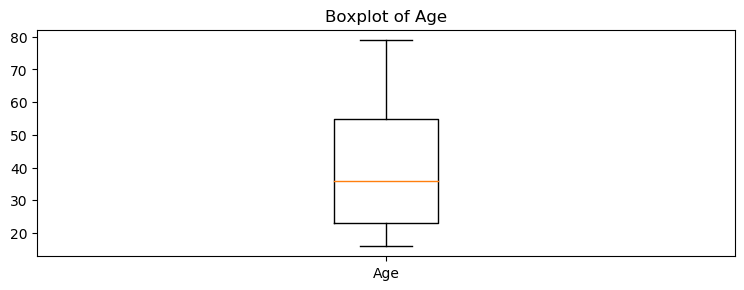

In [30]:
# INSERT YOUR CODE HERE
plt.figure(figsize = (9,3), dpi=100)
plt.boxplot(data_dict['Age'], labels=['Age'])
plt.title('Boxplot of Age')
plt.show()

In [11]:
# INSERT YOUR COMMENT HERE
"""
MEAN = Sum of all 'Age' values divided by number of data records
MEDIAN = The middle value for the 'Age' column
"""

"\nMEAN = Sum of all 'Age' values divided by number of data records\nMEDIAN = The middle value for the 'Age' column\n"

---
## **Instruction 3**
The following code segment is designed to examine data from the **Road_User** column. This column provides information about the types of road users involved in road accidents.


**Your tasks**:

1. Write your code to find and print out the number of **unique** road user types. (**2 marks**)
2. Write your code to find and print out the list of road user types that appear more than **16000** times in the dataset. (**2 marks**)
3. Write your code to find and print out the road user type with highest occurrence of accidents. Both the road user type and the number of accidents for the road user type need to be printed out (**2 marks**)
4. Write your code to construct a dictionary variable: ***accidents_by_road_user*** whose keys are unique road user types and values are the corresponding counts computed from the dataset. Print the dictionary. (**2 marks**)
5. Plot a bar chart for ***accidents_by_road_user*** sorted in descending order of values. (**2 marks**)

[**Total mark: 10**]

In [12]:
# INSERT YOUR CODE HERE 
print(len(set(data_dict['Road_User'])))

6


In [13]:
# INSERT YOUR CODE HERE
count_road_user = Counter(data_dict['Road_User'])
for i in set(data_dict['Road_User']):
    if (count_road_user[i] > 16000):
        print (i)

DRIVER
MOTORCYCLIST
PASSENGER


In [18]:
# INSERT YOUR CODE HERE 
highest_road_user = ""
highest_occured = 0
for i in set(data_dict['Road_User']):
    if (count_road_user[i] > highest_occured):
        highest_road_user = i
        highest_occured = count_road_user[i]
        
print(highest_road_user, "OCCURED:", highest_occured, "TIMES")

DRIVER OCCURED: 53000 TIMES


In [19]:
# INSERT YOUR CODE HERE 
accidents_by_road_user = {}
for i in set(data_dict['Road_User']):
    accidents_by_road_user[i] = count_road_user[i]
    
print(accidents_by_road_user)

{'UNKNOWN': 2704, 'PEDESTRIAN': 12544, 'BICYCLIST': 6276, 'DRIVER': 53000, 'MOTORCYCLIST': 18474, 'PASSENGER': 22543}


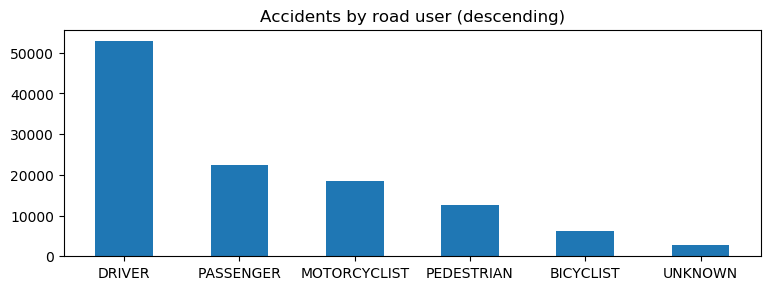

In [28]:
# INSERT YOUR CODE HERE 
#Resize
plt.figure(figsize = (9,3), dpi=100)
plt.title('Accidents by road user (descending)')
desc_accidents_by_road_user = dict(sorted(accidents_by_road_user.items(),key=operator.itemgetter(1),reverse=True))
plt.bar(desc_accidents_by_road_user.keys(), desc_accidents_by_road_user.values(), 0.5)
plt.show()

---
## **Instruction 4**
We shall further examine statistics of the road accidents in the dataset. 
**Your tasks here are:**
1. Write your code to print the number of males and females involved in accidents in the dataset. (**3 marks**)
2. Write your code to create indices of records for males and females in the dataset (**2 marks**)
3. Write your code to plot a histogram of number of accidents by age for females and males separately. Use 10-year bins. Plot both distributions on the same plot. (**2 marks**)
4. Briefly describe the meaning of the obtained results. (**3 marks**)

[**Total mark: 10**]

In [16]:
#INSERT YOUR CODE HERE
count_gender = Counter(data_dict['Gender'])
for i in set(data_dict['Gender']):
    if (i == "FEMALE" or i == "MALE"):
        print(i, "OCCURED:", count_gender[i])

FEMALE OCCURED: 49173
MALE OCCURED: 66310


In [17]:
#INSERT YOUR CODE HERE
for idx, x in enumerate(data_dict['Gender']):
    print(idx, x)

0 MALE
1 MALE
2 FEMALE
3 MALE
4 MALE
5 MALE
6 MALE
7 MALE
8 MALE
9 FEMALE
10 MALE
11 FEMALE
12 MALE
13 MALE
14 MALE
15 FEMALE
16 MALE
17 MALE
18 MALE
19 MALE
20 FEMALE
21 FEMALE
22 MALE
23 MALE
24 MALE
25 MALE
26 MALE
27 FEMALE
28 FEMALE
29 MALE
30 FEMALE
31 MALE
32 FEMALE
33 MALE
34 MALE
35 MALE
36 MALE
37 FEMALE
38 MALE
39 FEMALE
40 FEMALE
41 MALE
42 MALE
43 FEMALE
44 MALE
45 MALE
46 MALE
47 FEMALE
48 MALE
49 MALE
50 FEMALE
51 MALE
52 FEMALE
53 MALE
54 FEMALE
55 MALE
56 MALE
57 MALE
58 MALE
59 MALE
60 FEMALE
61 MALE
62 MALE
63 MALE
64 MALE
65 FEMALE
66 FEMALE
67 MALE
68 FEMALE
69 MALE
70 MALE
71 FEMALE
72 MALE
73 MALE
74 FEMALE
75 FEMALE
76 FEMALE
77 MALE
78 MALE
79 FEMALE
80 MALE
81 FEMALE
82 MALE
83 FEMALE
84 FEMALE
85 FEMALE
86 MALE
87 MALE
88 FEMALE
89 MALE
90 MALE
91 MALE
92 FEMALE
93 MALE
94 FEMALE
95 MALE
96 FEMALE
97 MALE
98 FEMALE
99 MALE
100 FEMALE
101 MALE
102 MALE
103 MALE
104 MALE
105 MALE
106 MALE
107 FEMALE
108 MALE
109 FEMALE
110 FEMALE
111 MALE
112 MALE
113 FEMALE
11

1159 MALE
1160 FEMALE
1161 FEMALE
1162 MALE
1163 MALE
1164 MALE
1165 FEMALE
1166 FEMALE
1167 FEMALE
1168 FEMALE
1169 MALE
1170 FEMALE
1171 FEMALE
1172 FEMALE
1173 MALE
1174 FEMALE
1175 MALE
1176 FEMALE
1177 MALE
1178 MALE
1179 MALE
1180 FEMALE
1181 FEMALE
1182 MALE
1183 FEMALE
1184 FEMALE
1185 FEMALE
1186 MALE
1187 FEMALE
1188 FEMALE
1189 FEMALE
1190 FEMALE
1191 MALE
1192 FEMALE
1193 MALE
1194 MALE
1195 MALE
1196 MALE
1197 FEMALE
1198 FEMALE
1199 MALE
1200 FEMALE
1201 FEMALE
1202 FEMALE
1203 FEMALE
1204 MALE
1205 FEMALE
1206 FEMALE
1207 MALE
1208 FEMALE
1209 MALE
1210 FEMALE
1211 MALE
1212 MALE
1213 MALE
1214 MALE
1215 MALE
1216 MALE
1217 FEMALE
1218 FEMALE
1219 MALE
1220 FEMALE
1221 FEMALE
1222 FEMALE
1223 MALE
1224 MALE
1225 MALE
1226 MALE
1227 MALE
1228 MALE
1229 MALE
1230 MALE
1231 MALE
1232 MALE
1233 MALE
1234 MALE
1235 MALE
1236 MALE
1237 MALE
1238 MALE
1239 MALE
1240 FEMALE
1241 MALE
1242 MALE
1243 MALE
1244 FEMALE
1245 MALE
1246 MALE
1247 MALE
1248 MALE
1249 FEMALE
1250 FEMALE


2159 MALE
2160 MALE
2161 FEMALE
2162 FEMALE
2163 FEMALE
2164 MALE
2165 MALE
2166 MALE
2167 FEMALE
2168 FEMALE
2169 MALE
2170 FEMALE
2171 FEMALE
2172 MALE
2173 MALE
2174 FEMALE
2175 MALE
2176 FEMALE
2177 FEMALE
2178 MALE
2179 MALE
2180 MALE
2181 FEMALE
2182 MALE
2183 MALE
2184 FEMALE
2185 MALE
2186 FEMALE
2187 MALE
2188 MALE
2189 MALE
2190 MALE
2191 FEMALE
2192 MALE
2193 FEMALE
2194 FEMALE
2195 FEMALE
2196 FEMALE
2197 FEMALE
2198 FEMALE
2199 MALE
2200 FEMALE
2201 MALE
2202 FEMALE
2203 FEMALE
2204 MALE
2205 FEMALE
2206 FEMALE
2207 MALE
2208 MALE
2209 FEMALE
2210 MALE
2211 MALE
2212 MALE
2213 MALE
2214 MALE
2215 FEMALE
2216 FEMALE
2217 FEMALE
2218 FEMALE
2219 FEMALE
2220 FEMALE
2221 FEMALE
2222 MALE
2223 MALE
2224 MALE
2225 FEMALE
2226 MALE
2227 FEMALE
2228 MALE
2229 FEMALE
2230 MALE
2231 MALE
2232 FEMALE
2233 MALE
2234 MALE
2235 FEMALE
2236 MALE
2237 FEMALE
2238 MALE
2239 FEMALE
2240 MALE
2241 FEMALE
2242 FEMALE
2243 MALE
2244 FEMALE
2245 MALE
2246 MALE
2247 MALE
2248 FEMALE
2249 FEMALE


3409 MALE
3410 FEMALE
3411 FEMALE
3412 MALE
3413 FEMALE
3414 FEMALE
3415 FEMALE
3416 FEMALE
3417 FEMALE
3418 FEMALE
3419 MALE
3420 MALE
3421 MALE
3422 MALE
3423 MALE
3424 MALE
3425 FEMALE
3426 MALE
3427 MALE
3428 FEMALE
3429 FEMALE
3430 MALE
3431 FEMALE
3432 FEMALE
3433 MALE
3434 MALE
3435 MALE
3436 MALE
3437 MALE
3438 MALE
3439 FEMALE
3440 FEMALE
3441 MALE
3442 MALE
3443 MALE
3444 MALE
3445 MALE
3446 MALE
3447 MALE
3448 MALE
3449 MALE
3450 MALE
3451 MALE
3452 FEMALE
3453 FEMALE
3454 MALE
3455 MALE
3456 MALE
3457 MALE
3458 MALE
3459 MALE
3460 MALE
3461 MALE
3462 MALE
3463 MALE
3464 FEMALE
3465 FEMALE
3466 MALE
3467 MALE
3468 MALE
3469 MALE
3470 FEMALE
3471 FEMALE
3472 MALE
3473 FEMALE
3474 FEMALE
3475 FEMALE
3476 MALE
3477 MALE
3478 FEMALE
3479 FEMALE
3480 FEMALE
3481 FEMALE
3482 FEMALE
3483 FEMALE
3484 MALE
3485 FEMALE
3486 FEMALE
3487 MALE
3488 MALE
3489 MALE
3490 FEMALE
3491 MALE
3492 FEMALE
3493 FEMALE
3494 FEMALE
3495 MALE
3496 MALE
3497 MALE
3498 MALE
3499 MALE
3500 FEMALE
3501 M

4658 MALE
4659 FEMALE
4660 MALE
4661 MALE
4662 MALE
4663 MALE
4664 MALE
4665 MALE
4666 FEMALE
4667 MALE
4668 FEMALE
4669 MALE
4670 MALE
4671 FEMALE
4672 MALE
4673 MALE
4674 MALE
4675 MALE
4676 MALE
4677 MALE
4678 FEMALE
4679 FEMALE
4680 MALE
4681 MALE
4682 FEMALE
4683 MALE
4684 FEMALE
4685 MALE
4686 MALE
4687 MALE
4688 MALE
4689 FEMALE
4690 MALE
4691 MALE
4692 MALE
4693 FEMALE
4694 MALE
4695 MALE
4696 MALE
4697 MALE
4698 MALE
4699 MALE
4700 MALE
4701 MALE
4702 FEMALE
4703 MALE
4704 FEMALE
4705 MALE
4706 FEMALE
4707 MALE
4708 MALE
4709 MALE
4710 MALE
4711 FEMALE
4712 MALE
4713 MALE
4714 MALE
4715 MALE
4716 MALE
4717 MALE
4718 FEMALE
4719 MALE
4720 MALE
4721 FEMALE
4722 FEMALE
4723 MALE
4724 MALE
4725 MALE
4726 MALE
4727 MALE
4728 FEMALE
4729 FEMALE
4730 FEMALE
4731 FEMALE
4732 MALE
4733 MALE
4734 MALE
4735 MALE
4736 MALE
4737 MALE
4738 FEMALE
4739 MALE
4740 MALE
4741 MALE
4742 MALE
4743 MALE
4744 MALE
4745 MALE
4746 FEMALE
4747 FEMALE
4748 MALE
4749 MALE
4750 MALE
4751 MALE
4752 MALE
47

5666 FEMALE
5667 FEMALE
5668 MALE
5669 MALE
5670 FEMALE
5671 MALE
5672 MALE
5673 FEMALE
5674 MALE
5675 MALE
5676 MALE
5677 FEMALE
5678 FEMALE
5679 FEMALE
5680 FEMALE
5681 FEMALE
5682 MALE
5683 MALE
5684 MALE
5685 FEMALE
5686 FEMALE
5687 MALE
5688 FEMALE
5689 MALE
5690 FEMALE
5691 MALE
5692 FEMALE
5693 MALE
5694 FEMALE
5695 MALE
5696 MALE
5697 MALE
5698 MALE
5699 FEMALE
5700 MALE
5701 MALE
5702 MALE
5703 MALE
5704 MALE
5705 MALE
5706 FEMALE
5707 FEMALE
5708 FEMALE
5709 MALE
5710 MALE
5711 MALE
5712 MALE
5713 FEMALE
5714 FEMALE
5715 MALE
5716 FEMALE
5717 MALE
5718 FEMALE
5719 FEMALE
5720 MALE
5721 FEMALE
5722 MALE
5723 FEMALE
5724 FEMALE
5725 MALE
5726 FEMALE
5727 MALE
5728 FEMALE
5729 MALE
5730 MALE
5731 FEMALE
5732 MALE
5733 MALE
5734 FEMALE
5735 MALE
5736 FEMALE
5737 FEMALE
5738 FEMALE
5739 MALE
5740 MALE
5741 MALE
5742 MALE
5743 FEMALE
5744 FEMALE
5745 FEMALE
5746 MALE
5747 MALE
5748 FEMALE
5749 MALE
5750 MALE
5751 FEMALE
5752 MALE
5753 FEMALE
5754 FEMALE
5755 FEMALE
5756 FEMALE
5757

6741 MALE
6742 MALE
6743 FEMALE
6744 MALE
6745 FEMALE
6746 FEMALE
6747 FEMALE
6748 MALE
6749 MALE
6750 FEMALE
6751 MALE
6752 MALE
6753 FEMALE
6754 FEMALE
6755 MALE
6756 MALE
6757 MALE
6758 MALE
6759 FEMALE
6760 FEMALE
6761 FEMALE
6762 MALE
6763 FEMALE
6764 MALE
6765 FEMALE
6766 MALE
6767 MALE
6768 FEMALE
6769 FEMALE
6770 FEMALE
6771 MALE
6772 FEMALE
6773 FEMALE
6774 FEMALE
6775 MALE
6776 MALE
6777 MALE
6778 FEMALE
6779 MALE
6780 FEMALE
6781 MALE
6782 FEMALE
6783 MALE
6784 FEMALE
6785 FEMALE
6786 FEMALE
6787 MALE
6788 MALE
6789 MALE
6790 FEMALE
6791 MALE
6792 MALE
6793 MALE
6794 FEMALE
6795 FEMALE
6796 MALE
6797 FEMALE
6798 FEMALE
6799 MALE
6800 FEMALE
6801 MALE
6802 MALE
6803 MALE
6804 FEMALE
6805 MALE
6806 MALE
6807 MALE
6808 FEMALE
6809 FEMALE
6810 FEMALE
6811 FEMALE
6812 MALE
6813 FEMALE
6814 MALE
6815 MALE
6816 FEMALE
6817 FEMALE
6818 FEMALE
6819 FEMALE
6820 FEMALE
6821 FEMALE
6822 MALE
6823 FEMALE
6824 MALE
6825 FEMALE
6826 MALE
6827 FEMALE
6828 MALE
6829 MALE
6830 MALE
6831 MALE


7897 FEMALE
7898 FEMALE
7899 MALE
7900 FEMALE
7901 MALE
7902 FEMALE
7903 MALE
7904 MALE
7905 MALE
7906 MALE
7907 FEMALE
7908 FEMALE
7909 MALE
7910 FEMALE
7911 FEMALE
7912 FEMALE
7913 MALE
7914 MALE
7915 FEMALE
7916 FEMALE
7917 FEMALE
7918 MALE
7919 MALE
7920 MALE
7921 FEMALE
7922 MALE
7923 FEMALE
7924 FEMALE
7925 MALE
7926 FEMALE
7927 FEMALE
7928 MALE
7929 MALE
7930 MALE
7931 MALE
7932 MALE
7933 FEMALE
7934 MALE
7935 MALE
7936 MALE
7937 FEMALE
7938 MALE
7939 FEMALE
7940 MALE
7941 FEMALE
7942 FEMALE
7943 FEMALE
7944 MALE
7945 MALE
7946 MALE
7947 MALE
7948 FEMALE
7949 MALE
7950 MALE
7951 FEMALE
7952 FEMALE
7953 MALE
7954 FEMALE
7955 MALE
7956 FEMALE
7957 MALE
7958 FEMALE
7959 MALE
7960 FEMALE
7961 FEMALE
7962 FEMALE
7963 FEMALE
7964 FEMALE
7965 MALE
7966 FEMALE
7967 MALE
7968 FEMALE
7969 MALE
7970 FEMALE
7971 FEMALE
7972 FEMALE
7973 FEMALE
7974 MALE
7975 MALE
7976 MALE
7977 MALE
7978 MALE
7979 FEMALE
7980 FEMALE
7981 FEMALE
7982 MALE
7983 FEMALE
7984 MALE
7985 MALE
7986 MALE
7987 MALE
79

9157 FEMALE
9158 MALE
9159 MALE
9160 FEMALE
9161 MALE
9162 MALE
9163 FEMALE
9164 FEMALE
9165 MALE
9166 MALE
9167 MALE
9168 MALE
9169 MALE
9170 FEMALE
9171 MALE
9172 MALE
9173 MALE
9174 MALE
9175 FEMALE
9176 MALE
9177 MALE
9178 MALE
9179 FEMALE
9180 MALE
9181 FEMALE
9182 FEMALE
9183 MALE
9184 FEMALE
9185 FEMALE
9186 MALE
9187 MALE
9188 MALE
9189 FEMALE
9190 MALE
9191 FEMALE
9192 MALE
9193 MALE
9194 MALE
9195 FEMALE
9196 MALE
9197 FEMALE
9198 MALE
9199 MALE
9200 FEMALE
9201 MALE
9202 FEMALE
9203 MALE
9204 FEMALE
9205 MALE
9206 MALE
9207 FEMALE
9208 MALE
9209 FEMALE
9210 MALE
9211 FEMALE
9212 MALE
9213 MALE
9214 MALE
9215 MALE
9216 MALE
9217 MALE
9218 FEMALE
9219 MALE
9220 MALE
9221 FEMALE
9222 MALE
9223 FEMALE
9224 MALE
9225 MALE
9226 FEMALE
9227 FEMALE
9228 MALE
9229 MALE
9230 MALE
9231 FEMALE
9232 MALE
9233 MALE
9234 FEMALE
9235 MALE
9236 FEMALE
9237 FEMALE
9238 MALE
9239 MALE
9240 MALE
9241 MALE
9242 MALE
9243 FEMALE
9244 FEMALE
9245 MALE
9246 MALE
9247 MALE
9248 FEMALE
9249 MALE
9250

10407 MALE
10408 FEMALE
10409 MALE
10410 MALE
10411 MALE
10412 FEMALE
10413 MALE
10414 FEMALE
10415 MALE
10416 MALE
10417 FEMALE
10418 MALE
10419 MALE
10420 FEMALE
10421 FEMALE
10422 FEMALE
10423 MALE
10424 MALE
10425 FEMALE
10426 MALE
10427 FEMALE
10428 FEMALE
10429 FEMALE
10430 MALE
10431 MALE
10432 FEMALE
10433 FEMALE
10434 FEMALE
10435 MALE
10436 MALE
10437 FEMALE
10438 MALE
10439 MALE
10440 MALE
10441 MALE
10442 FEMALE
10443 MALE
10444 MALE
10445 MALE
10446 FEMALE
10447 MALE
10448 FEMALE
10449 FEMALE
10450 MALE
10451 MALE
10452 MALE
10453 FEMALE
10454 MALE
10455 MALE
10456 FEMALE
10457 MALE
10458 MALE
10459 MALE
10460 FEMALE
10461 FEMALE
10462 FEMALE
10463 FEMALE
10464 MALE
10465 MALE
10466 MALE
10467 FEMALE
10468 MALE
10469 FEMALE
10470 MALE
10471 MALE
10472 FEMALE
10473 MALE
10474 MALE
10475 FEMALE
10476 MALE
10477 FEMALE
10478 MALE
10479 MALE
10480 FEMALE
10481 MALE
10482 FEMALE
10483 MALE
10484 FEMALE
10485 FEMALE
10486 MALE
10487 FEMALE
10488 MALE
10489 MALE
10490 MALE
10491 

11532 FEMALE
11533 FEMALE
11534 FEMALE
11535 MALE
11536 MALE
11537 FEMALE
11538 MALE
11539 FEMALE
11540 MALE
11541 FEMALE
11542 MALE
11543 MALE
11544 MALE
11545 MALE
11546 FEMALE
11547 MALE
11548 MALE
11549 FEMALE
11550 MALE
11551 MALE
11552 MALE
11553 MALE
11554 MALE
11555 MALE
11556 MALE
11557 MALE
11558 MALE
11559 FEMALE
11560 FEMALE
11561 FEMALE
11562 MALE
11563 FEMALE
11564 MALE
11565 MALE
11566 MALE
11567 FEMALE
11568 MALE
11569 MALE
11570 MALE
11571 MALE
11572 FEMALE
11573 FEMALE
11574 MALE
11575 FEMALE
11576 MALE
11577 MALE
11578 MALE
11579 MALE
11580 MALE
11581 MALE
11582 MALE
11583 FEMALE
11584 MALE
11585 MALE
11586 MALE
11587 FEMALE
11588 FEMALE
11589 FEMALE
11590 MALE
11591 MALE
11592 MALE
11593 MALE
11594 FEMALE
11595 FEMALE
11596 MALE
11597 FEMALE
11598 MALE
11599 MALE
11600 MALE
11601 FEMALE
11602 MALE
11603 MALE
11604 MALE
11605 MALE
11606 MALE
11607 MALE
11608 MALE
11609 FEMALE
11610 MALE
11611 MALE
11612 MALE
11613 MALE
11614 MALE
11615 MALE
11616 MALE
11617 MALE
1161

12699 FEMALE
12700 MALE
12701 MALE
12702 FEMALE
12703 FEMALE
12704 FEMALE
12705 MALE
12706 MALE
12707 MALE
12708 FEMALE
12709 MALE
12710 FEMALE
12711 MALE
12712 MALE
12713 FEMALE
12714 MALE
12715 FEMALE
12716 MALE
12717 MALE
12718 FEMALE
12719 MALE
12720 MALE
12721 FEMALE
12722 MALE
12723 FEMALE
12724 FEMALE
12725 FEMALE
12726 MALE
12727 FEMALE
12728 FEMALE
12729 MALE
12730 FEMALE
12731 MALE
12732 FEMALE
12733 MALE
12734 MALE
12735 MALE
12736 MALE
12737 MALE
12738 MALE
12739 FEMALE
12740 FEMALE
12741 MALE
12742 MALE
12743 FEMALE
12744 MALE
12745 MALE
12746 MALE
12747 MALE
12748 MALE
12749 MALE
12750 FEMALE
12751 MALE
12752 MALE
12753 MALE
12754 MALE
12755 FEMALE
12756 MALE
12757 MALE
12758 FEMALE
12759 FEMALE
12760 FEMALE
12761 MALE
12762 FEMALE
12763 FEMALE
12764 MALE
12765 FEMALE
12766 MALE
12767 FEMALE
12768 MALE
12769 MALE
12770 MALE
12771 MALE
12772 MALE
12773 FEMALE
12774 FEMALE
12775 FEMALE
12776 MALE
12777 FEMALE
12778 FEMALE
12779 MALE
12780 FEMALE
12781 MALE
12782 FEMALE
1278

14007 MALE
14008 MALE
14009 MALE
14010 MALE
14011 MALE
14012 MALE
14013 FEMALE
14014 MALE
14015 MALE
14016 MALE
14017 MALE
14018 MALE
14019 MALE
14020 FEMALE
14021 FEMALE
14022 FEMALE
14023 MALE
14024 MALE
14025 FEMALE
14026 FEMALE
14027 MALE
14028 FEMALE
14029 MALE
14030 FEMALE
14031 MALE
14032 MALE
14033 FEMALE
14034 MALE
14035 MALE
14036 MALE
14037 FEMALE
14038 FEMALE
14039 FEMALE
14040 MALE
14041 MALE
14042 MALE
14043 MALE
14044 MALE
14045 FEMALE
14046 FEMALE
14047 FEMALE
14048 MALE
14049 FEMALE
14050 FEMALE
14051 FEMALE
14052 FEMALE
14053 FEMALE
14054 FEMALE
14055 MALE
14056 FEMALE
14057 FEMALE
14058 FEMALE
14059 FEMALE
14060 MALE
14061 FEMALE
14062 FEMALE
14063 FEMALE
14064 MALE
14065 MALE
14066 MALE
14067 FEMALE
14068 MALE
14069 FEMALE
14070 FEMALE
14071 FEMALE
14072 MALE
14073 FEMALE
14074 FEMALE
14075 MALE
14076 FEMALE
14077 MALE
14078 FEMALE
14079 MALE
14080 MALE
14081 MALE
14082 FEMALE
14083 FEMALE
14084 FEMALE
14085 MALE
14086 MALE
14087 MALE
14088 MALE
14089 MALE
14090 MAL

15377 MALE
15378 FEMALE
15379 FEMALE
15380 FEMALE
15381 FEMALE
15382 MALE
15383 FEMALE
15384 MALE
15385 MALE
15386 FEMALE
15387 FEMALE
15388 MALE
15389 FEMALE
15390 MALE
15391 FEMALE
15392 FEMALE
15393 FEMALE
15394 FEMALE
15395 FEMALE
15396 MALE
15397 FEMALE
15398 MALE
15399 FEMALE
15400 MALE
15401 FEMALE
15402 FEMALE
15403 FEMALE
15404 FEMALE
15405 FEMALE
15406 FEMALE
15407 MALE
15408 MALE
15409 MALE
15410 MALE
15411 MALE
15412 MALE
15413 MALE
15414 MALE
15415 MALE
15416 MALE
15417 MALE
15418 MALE
15419 FEMALE
15420 FEMALE
15421 MALE
15422 FEMALE
15423 MALE
15424 MALE
15425 MALE
15426 MALE
15427 MALE
15428 FEMALE
15429 MALE
15430 MALE
15431 MALE
15432 MALE
15433 MALE
15434 FEMALE
15435 MALE
15436 FEMALE
15437 MALE
15438 MALE
15439 FEMALE
15440 FEMALE
15441 MALE
15442 FEMALE
15443 FEMALE
15444 MALE
15445 FEMALE
15446 FEMALE
15447 FEMALE
15448 FEMALE
15449 FEMALE
15450 MALE
15451 FEMALE
15452 MALE
15453 FEMALE
15454 MALE
15455 FEMALE
15456 FEMALE
15457 MALE
15458 MALE
15459 FEMALE
15460

16530 MALE
16531 FEMALE
16532 MALE
16533 MALE
16534 MALE
16535 FEMALE
16536 FEMALE
16537 MALE
16538 MALE
16539 MALE
16540 MALE
16541 FEMALE
16542 MALE
16543 MALE
16544 FEMALE
16545 MALE
16546 FEMALE
16547 FEMALE
16548 MALE
16549 FEMALE
16550 FEMALE
16551 FEMALE
16552 FEMALE
16553 MALE
16554 FEMALE
16555 MALE
16556 MALE
16557 MALE
16558 MALE
16559 MALE
16560 FEMALE
16561 MALE
16562 MALE
16563 MALE
16564 FEMALE
16565 MALE
16566 MALE
16567 FEMALE
16568 MALE
16569 MALE
16570 MALE
16571 MALE
16572 MALE
16573 MALE
16574 FEMALE
16575 MALE
16576 MALE
16577 FEMALE
16578 FEMALE
16579 MALE
16580 MALE
16581 MALE
16582 MALE
16583 MALE
16584 MALE
16585 MALE
16586 FEMALE
16587 FEMALE
16588 FEMALE
16589 MALE
16590 FEMALE
16591 MALE
16592 MALE
16593 MALE
16594 FEMALE
16595 MALE
16596 MALE
16597 FEMALE
16598 MALE
16599 MALE
16600 FEMALE
16601 FEMALE
16602 MALE
16603 FEMALE
16604 MALE
16605 MALE
16606 FEMALE
16607 MALE
16608 MALE
16609 MALE
16610 MALE
16611 MALE
16612 MALE
16613 MALE
16614 MALE
16615 FEM

17735 FEMALE
17736 FEMALE
17737 MALE
17738 FEMALE
17739 FEMALE
17740 MALE
17741 MALE
17742 FEMALE
17743 MALE
17744 MALE
17745 FEMALE
17746 FEMALE
17747 FEMALE
17748 FEMALE
17749 FEMALE
17750 FEMALE
17751 FEMALE
17752 FEMALE
17753 FEMALE
17754 FEMALE
17755 MALE
17756 FEMALE
17757 FEMALE
17758 MALE
17759 FEMALE
17760 FEMALE
17761 FEMALE
17762 MALE
17763 MALE
17764 MALE
17765 FEMALE
17766 MALE
17767 FEMALE
17768 FEMALE
17769 FEMALE
17770 MALE
17771 FEMALE
17772 FEMALE
17773 FEMALE
17774 MALE
17775 MALE
17776 FEMALE
17777 MALE
17778 FEMALE
17779 FEMALE
17780 MALE
17781 FEMALE
17782 FEMALE
17783 MALE
17784 MALE
17785 FEMALE
17786 MALE
17787 MALE
17788 MALE
17789 MALE
17790 MALE
17791 MALE
17792 FEMALE
17793 FEMALE
17794 MALE
17795 MALE
17796 FEMALE
17797 MALE
17798 FEMALE
17799 FEMALE
17800 MALE
17801 FEMALE
17802 FEMALE
17803 MALE
17804 MALE
17805 MALE
17806 FEMALE
17807 MALE
17808 FEMALE
17809 MALE
17810 MALE
17811 MALE
17812 FEMALE
17813 MALE
17814 MALE
17815 FEMALE
17816 FEMALE
17817 FE

18967 FEMALE
18968 MALE
18969 FEMALE
18970 MALE
18971 FEMALE
18972 FEMALE
18973 MALE
18974 FEMALE
18975 MALE
18976 FEMALE
18977 MALE
18978 FEMALE
18979 MALE
18980 MALE
18981 FEMALE
18982 MALE
18983 FEMALE
18984 FEMALE
18985 MALE
18986 FEMALE
18987 MALE
18988 MALE
18989 FEMALE
18990 FEMALE
18991 FEMALE
18992 MALE
18993 MALE
18994 MALE
18995 MALE
18996 MALE
18997 MALE
18998 MALE
18999 FEMALE
19000 MALE
19001 MALE
19002 FEMALE
19003 FEMALE
19004 MALE
19005 MALE
19006 MALE
19007 MALE
19008 FEMALE
19009 MALE
19010 FEMALE
19011 FEMALE
19012 MALE
19013 MALE
19014 FEMALE
19015 MALE
19016 MALE
19017 MALE
19018 MALE
19019 MALE
19020 FEMALE
19021 MALE
19022 FEMALE
19023 MALE
19024 MALE
19025 MALE
19026 MALE
19027 MALE
19028 FEMALE
19029 FEMALE
19030 MALE
19031 MALE
19032 MALE
19033 FEMALE
19034 MALE
19035 MALE
19036 FEMALE
19037 FEMALE
19038 FEMALE
19039 MALE
19040 FEMALE
19041 FEMALE
19042 MALE
19043 FEMALE
19044 MALE
19045 MALE
19046 FEMALE
19047 MALE
19048 MALE
19049 FEMALE
19050 MALE
19051 MA

20073 MALE
20074 FEMALE
20075 FEMALE
20076 FEMALE
20077 MALE
20078 MALE
20079 FEMALE
20080 MALE
20081 FEMALE
20082 FEMALE
20083 FEMALE
20084 FEMALE
20085 MALE
20086 FEMALE
20087 FEMALE
20088 MALE
20089 FEMALE
20090 MALE
20091 FEMALE
20092 MALE
20093 FEMALE
20094 MALE
20095 MALE
20096 MALE
20097 MALE
20098 MALE
20099 FEMALE
20100 FEMALE
20101 MALE
20102 MALE
20103 MALE
20104 MALE
20105 FEMALE
20106 MALE
20107 MALE
20108 MALE
20109 MALE
20110 MALE
20111 MALE
20112 FEMALE
20113 MALE
20114 MALE
20115 MALE
20116 MALE
20117 MALE
20118 MALE
20119 MALE
20120 MALE
20121 MALE
20122 FEMALE
20123 MALE
20124 FEMALE
20125 MALE
20126 MALE
20127 FEMALE
20128 FEMALE
20129 FEMALE
20130 FEMALE
20131 FEMALE
20132 FEMALE
20133 MALE
20134 MALE
20135 MALE
20136 MALE
20137 MALE
20138 FEMALE
20139 MALE
20140 FEMALE
20141 FEMALE
20142 FEMALE
20143 MALE
20144 FEMALE
20145 MALE
20146 MALE
20147 MALE
20148 FEMALE
20149 MALE
20150 MALE
20151 FEMALE
20152 MALE
20153 MALE
20154 MALE
20155 FEMALE
20156 FEMALE
20157 MA

21373 MALE
21374 MALE
21375 MALE
21376 FEMALE
21377 FEMALE
21378 FEMALE
21379 MALE
21380 MALE
21381 FEMALE
21382 MALE
21383 MALE
21384 FEMALE
21385 MALE
21386 MALE
21387 FEMALE
21388 MALE
21389 FEMALE
21390 FEMALE
21391 MALE
21392 MALE
21393 FEMALE
21394 FEMALE
21395 MALE
21396 FEMALE
21397 MALE
21398 MALE
21399 FEMALE
21400 FEMALE
21401 FEMALE
21402 FEMALE
21403 FEMALE
21404 MALE
21405 MALE
21406 FEMALE
21407 MALE
21408 FEMALE
21409 FEMALE
21410 FEMALE
21411 FEMALE
21412 MALE
21413 MALE
21414 MALE
21415 MALE
21416 MALE
21417 FEMALE
21418 FEMALE
21419 MALE
21420 FEMALE
21421 FEMALE
21422 MALE
21423 FEMALE
21424 FEMALE
21425 MALE
21426 MALE
21427 MALE
21428 FEMALE
21429 FEMALE
21430 MALE
21431 FEMALE
21432 MALE
21433 MALE
21434 FEMALE
21435 FEMALE
21436 MALE
21437 MALE
21438 FEMALE
21439 FEMALE
21440 FEMALE
21441 MALE
21442 MALE
21443 MALE
21444 MALE
21445 FEMALE
21446 FEMALE
21447 MALE
21448 MALE
21449 FEMALE
21450 FEMALE
21451 FEMALE
21452 FEMALE
21453 FEMALE
21454 MALE
21455 FEMALE
2

22477 MALE
22478 MALE
22479 MALE
22480 MALE
22481 MALE
22482 MALE
22483 FEMALE
22484 MALE
22485 MALE
22486 FEMALE
22487 MALE
22488 MALE
22489 FEMALE
22490 MALE
22491 FEMALE
22492 MALE
22493 FEMALE
22494 MALE
22495 MALE
22496 MALE
22497 MALE
22498 MALE
22499 FEMALE
22500 MALE
22501 FEMALE
22502 MALE
22503 FEMALE
22504 MALE
22505 MALE
22506 FEMALE
22507 MALE
22508 MALE
22509 MALE
22510 MALE
22511 FEMALE
22512 FEMALE
22513 FEMALE
22514 FEMALE
22515 FEMALE
22516 MALE
22517 MALE
22518 MALE
22519 FEMALE
22520 FEMALE
22521 FEMALE
22522 MALE
22523 MALE
22524 MALE
22525 MALE
22526 MALE
22527 FEMALE
22528 MALE
22529 MALE
22530 MALE
22531 MALE
22532 MALE
22533 FEMALE
22534 MALE
22535 FEMALE
22536 MALE
22537 MALE
22538 MALE
22539 MALE
22540 FEMALE
22541 MALE
22542 MALE
22543 FEMALE
22544 MALE
22545 MALE
22546 MALE
22547 MALE
22548 MALE
22549 FEMALE
22550 MALE
22551 FEMALE
22552 MALE
22553 MALE
22554 MALE
22555 MALE
22556 MALE
22557 MALE
22558 MALE
22559 MALE
22560 MALE
22561 MALE
22562 MALE
22563 

23795 MALE
23796 MALE
23797 FEMALE
23798 FEMALE
23799 FEMALE
23800 FEMALE
23801 MALE
23802 FEMALE
23803 MALE
23804 MALE
23805 FEMALE
23806 MALE
23807 MALE
23808 MALE
23809 FEMALE
23810 MALE
23811 FEMALE
23812 MALE
23813 FEMALE
23814 FEMALE
23815 FEMALE
23816 MALE
23817 MALE
23818 MALE
23819 MALE
23820 FEMALE
23821 FEMALE
23822 MALE
23823 FEMALE
23824 FEMALE
23825 MALE
23826 FEMALE
23827 MALE
23828 MALE
23829 MALE
23830 MALE
23831 FEMALE
23832 FEMALE
23833 MALE
23834 FEMALE
23835 FEMALE
23836 FEMALE
23837 MALE
23838 FEMALE
23839 MALE
23840 MALE
23841 MALE
23842 MALE
23843 FEMALE
23844 MALE
23845 MALE
23846 MALE
23847 MALE
23848 MALE
23849 MALE
23850 MALE
23851 FEMALE
23852 MALE
23853 FEMALE
23854 MALE
23855 MALE
23856 MALE
23857 MALE
23858 MALE
23859 MALE
23860 MALE
23861 MALE
23862 FEMALE
23863 MALE
23864 MALE
23865 FEMALE
23866 FEMALE
23867 FEMALE
23868 MALE
23869 MALE
23870 MALE
23871 MALE
23872 MALE
23873 FEMALE
23874 MALE
23875 MALE
23876 MALE
23877 MALE
23878 MALE
23879 MALE
23880

24904 MALE
24905 MALE
24906 MALE
24907 MALE
24908 MALE
24909 MALE
24910 MALE
24911 MALE
24912 FEMALE
24913 MALE
24914 FEMALE
24915 FEMALE
24916 MALE
24917 MALE
24918 MALE
24919 MALE
24920 MALE
24921 MALE
24922 MALE
24923 MALE
24924 FEMALE
24925 MALE
24926 FEMALE
24927 MALE
24928 FEMALE
24929 MALE
24930 MALE
24931 MALE
24932 MALE
24933 MALE
24934 FEMALE
24935 MALE
24936 MALE
24937 FEMALE
24938 FEMALE
24939 MALE
24940 FEMALE
24941 FEMALE
24942 MALE
24943 MALE
24944 MALE
24945 FEMALE
24946 MALE
24947 FEMALE
24948 FEMALE
24949 MALE
24950 MALE
24951 FEMALE
24952 MALE
24953 MALE
24954 FEMALE
24955 FEMALE
24956 FEMALE
24957 MALE
24958 FEMALE
24959 MALE
24960 FEMALE
24961 MALE
24962 FEMALE
24963 MALE
24964 MALE
24965 FEMALE
24966 FEMALE
24967 MALE
24968 MALE
24969 MALE
24970 MALE
24971 MALE
24972 MALE
24973 MALE
24974 FEMALE
24975 FEMALE
24976 FEMALE
24977 MALE
24978 MALE
24979 MALE
24980 MALE
24981 MALE
24982 MALE
24983 MALE
24984 FEMALE
24985 MALE
24986 MALE
24987 FEMALE
24988 MALE
24989 MAL

26154 FEMALE
26155 FEMALE
26156 MALE
26157 FEMALE
26158 MALE
26159 FEMALE
26160 MALE
26161 MALE
26162 MALE
26163 MALE
26164 MALE
26165 MALE
26166 FEMALE
26167 MALE
26168 MALE
26169 MALE
26170 FEMALE
26171 MALE
26172 MALE
26173 MALE
26174 MALE
26175 MALE
26176 MALE
26177 MALE
26178 FEMALE
26179 FEMALE
26180 FEMALE
26181 FEMALE
26182 MALE
26183 FEMALE
26184 MALE
26185 FEMALE
26186 FEMALE
26187 FEMALE
26188 FEMALE
26189 FEMALE
26190 FEMALE
26191 MALE
26192 FEMALE
26193 FEMALE
26194 MALE
26195 FEMALE
26196 MALE
26197 MALE
26198 MALE
26199 MALE
26200 FEMALE
26201 FEMALE
26202 FEMALE
26203 FEMALE
26204 MALE
26205 FEMALE
26206 MALE
26207 FEMALE
26208 MALE
26209 MALE
26210 MALE
26211 MALE
26212 MALE
26213 MALE
26214 FEMALE
26215 FEMALE
26216 MALE
26217 MALE
26218 MALE
26219 FEMALE
26220 MALE
26221 MALE
26222 MALE
26223 MALE
26224 FEMALE
26225 FEMALE
26226 MALE
26227 FEMALE
26228 MALE
26229 MALE
26230 FEMALE
26231 MALE
26232 MALE
26233 MALE
26234 FEMALE
26235 MALE
26236 MALE
26237 MALE
26238 FE

27404 FEMALE
27405 MALE
27406 MALE
27407 MALE
27408 MALE
27409 MALE
27410 MALE
27411 FEMALE
27412 MALE
27413 FEMALE
27414 FEMALE
27415 MALE
27416 MALE
27417 MALE
27418 MALE
27419 MALE
27420 MALE
27421 FEMALE
27422 MALE
27423 MALE
27424 MALE
27425 MALE
27426 MALE
27427 FEMALE
27428 FEMALE
27429 MALE
27430 FEMALE
27431 MALE
27432 FEMALE
27433 FEMALE
27434 MALE
27435 FEMALE
27436 MALE
27437 MALE
27438 MALE
27439 FEMALE
27440 FEMALE
27441 MALE
27442 FEMALE
27443 MALE
27444 MALE
27445 FEMALE
27446 FEMALE
27447 MALE
27448 MALE
27449 MALE
27450 MALE
27451 FEMALE
27452 FEMALE
27453 MALE
27454 MALE
27455 FEMALE
27456 MALE
27457 FEMALE
27458 MALE
27459 FEMALE
27460 FEMALE
27461 FEMALE
27462 MALE
27463 FEMALE
27464 MALE
27465 FEMALE
27466 FEMALE
27467 FEMALE
27468 FEMALE
27469 MALE
27470 MALE
27471 MALE
27472 MALE
27473 MALE
27474 MALE
27475 MALE
27476 FEMALE
27477 FEMALE
27478 FEMALE
27479 FEMALE
27480 FEMALE
27481 MALE
27482 MALE
27483 MALE
27484 FEMALE
27485 MALE
27486 MALE
27487 FEMALE
27488 

28403 MALE
28404 MALE
28405 FEMALE
28406 FEMALE
28407 MALE
28408 FEMALE
28409 MALE
28410 MALE
28411 MALE
28412 FEMALE
28413 MALE
28414 MALE
28415 MALE
28416 MALE
28417 MALE
28418 MALE
28419 MALE
28420 MALE
28421 MALE
28422 MALE
28423 MALE
28424 FEMALE
28425 MALE
28426 FEMALE
28427 MALE
28428 MALE
28429 MALE
28430 MALE
28431 MALE
28432 MALE
28433 FEMALE
28434 FEMALE
28435 MALE
28436 MALE
28437 MALE
28438 FEMALE
28439 MALE
28440 FEMALE
28441 MALE
28442 MALE
28443 MALE
28444 FEMALE
28445 FEMALE
28446 MALE
28447 FEMALE
28448 MALE
28449 MALE
28450 MALE
28451 FEMALE
28452 MALE
28453 FEMALE
28454 FEMALE
28455 FEMALE
28456 FEMALE
28457 MALE
28458 FEMALE
28459 FEMALE
28460 FEMALE
28461 FEMALE
28462 FEMALE
28463 FEMALE
28464 MALE
28465 FEMALE
28466 FEMALE
28467 MALE
28468 FEMALE
28469 MALE
28470 MALE
28471 FEMALE
28472 MALE
28473 MALE
28474 FEMALE
28475 MALE
28476 MALE
28477 MALE
28478 MALE
28479 MALE
28480 FEMALE
28481 MALE
28482 MALE
28483 FEMALE
28484 MALE
28485 MALE
28486 MALE
28487 MALE
284

29443 FEMALE
29444 FEMALE
29445 MALE
29446 FEMALE
29447 FEMALE
29448 MALE
29449 MALE
29450 MALE
29451 FEMALE
29452 FEMALE
29453 FEMALE
29454 FEMALE
29455 MALE
29456 FEMALE
29457 FEMALE
29458 FEMALE
29459 FEMALE
29460 FEMALE
29461 FEMALE
29462 FEMALE
29463 MALE
29464 FEMALE
29465 FEMALE
29466 MALE
29467 MALE
29468 FEMALE
29469 MALE
29470 MALE
29471 MALE
29472 MALE
29473 MALE
29474 FEMALE
29475 MALE
29476 FEMALE
29477 FEMALE
29478 FEMALE
29479 MALE
29480 FEMALE
29481 MALE
29482 FEMALE
29483 MALE
29484 MALE
29485 MALE
29486 MALE
29487 MALE
29488 MALE
29489 MALE
29490 FEMALE
29491 MALE
29492 MALE
29493 FEMALE
29494 MALE
29495 FEMALE
29496 MALE
29497 FEMALE
29498 MALE
29499 MALE
29500 FEMALE
29501 MALE
29502 FEMALE
29503 FEMALE
29504 FEMALE
29505 FEMALE
29506 MALE
29507 FEMALE
29508 MALE
29509 MALE
29510 FEMALE
29511 MALE
29512 MALE
29513 FEMALE
29514 FEMALE
29515 FEMALE
29516 MALE
29517 FEMALE
29518 MALE
29519 MALE
29520 FEMALE
29521 MALE
29522 MALE
29523 MALE
29524 FEMALE
29525 FEMALE
295

30796 MALE
30797 MALE
30798 MALE
30799 MALE
30800 MALE
30801 MALE
30802 FEMALE
30803 MALE
30804 MALE
30805 MALE
30806 MALE
30807 MALE
30808 FEMALE
30809 MALE
30810 FEMALE
30811 MALE
30812 MALE
30813 MALE
30814 FEMALE
30815 FEMALE
30816 MALE
30817 MALE
30818 MALE
30819 MALE
30820 FEMALE
30821 MALE
30822 MALE
30823 MALE
30824 MALE
30825 MALE
30826 MALE
30827 FEMALE
30828 MALE
30829 MALE
30830 FEMALE
30831 FEMALE
30832 FEMALE
30833 MALE
30834 FEMALE
30835 FEMALE
30836 MALE
30837 FEMALE
30838 MALE
30839 FEMALE
30840 MALE
30841 MALE
30842 MALE
30843 FEMALE
30844 MALE
30845 MALE
30846 MALE
30847 MALE
30848 MALE
30849 MALE
30850 MALE
30851 MALE
30852 MALE
30853 MALE
30854 MALE
30855 MALE
30856 MALE
30857 MALE
30858 MALE
30859 MALE
30860 MALE
30861 FEMALE
30862 MALE
30863 MALE
30864 MALE
30865 FEMALE
30866 FEMALE
30867 MALE
30868 FEMALE
30869 MALE
30870 MALE
30871 FEMALE
30872 FEMALE
30873 FEMALE
30874 MALE
30875 FEMALE
30876 FEMALE
30877 MALE
30878 MALE
30879 FEMALE
30880 MALE
30881 FEMALE
30

32153 FEMALE
32154 MALE
32155 FEMALE
32156 FEMALE
32157 MALE
32158 FEMALE
32159 FEMALE
32160 FEMALE
32161 MALE
32162 FEMALE
32163 MALE
32164 FEMALE
32165 MALE
32166 FEMALE
32167 FEMALE
32168 MALE
32169 MALE
32170 MALE
32171 MALE
32172 MALE
32173 FEMALE
32174 FEMALE
32175 MALE
32176 MALE
32177 MALE
32178 MALE
32179 FEMALE
32180 MALE
32181 MALE
32182 MALE
32183 FEMALE
32184 FEMALE
32185 MALE
32186 MALE
32187 MALE
32188 FEMALE
32189 MALE
32190 MALE
32191 FEMALE
32192 FEMALE
32193 MALE
32194 FEMALE
32195 FEMALE
32196 MALE
32197 FEMALE
32198 FEMALE
32199 FEMALE
32200 FEMALE
32201 FEMALE
32202 FEMALE
32203 FEMALE
32204 FEMALE
32205 FEMALE
32206 FEMALE
32207 FEMALE
32208 FEMALE
32209 MALE
32210 FEMALE
32211 FEMALE
32212 FEMALE
32213 FEMALE
32214 FEMALE
32215 MALE
32216 FEMALE
32217 FEMALE
32218 MALE
32219 FEMALE
32220 FEMALE
32221 MALE
32222 MALE
32223 MALE
32224 MALE
32225 FEMALE
32226 MALE
32227 MALE
32228 MALE
32229 FEMALE
32230 MALE
32231 FEMALE
32232 FEMALE
32233 FEMALE
32234 MALE
32235 

33402 MALE
33403 FEMALE
33404 MALE
33405 MALE
33406 MALE
33407 FEMALE
33408 MALE
33409 FEMALE
33410 MALE
33411 MALE
33412 FEMALE
33413 FEMALE
33414 FEMALE
33415 MALE
33416 FEMALE
33417 FEMALE
33418 FEMALE
33419 MALE
33420 MALE
33421 FEMALE
33422 FEMALE
33423 MALE
33424 FEMALE
33425 FEMALE
33426 MALE
33427 MALE
33428 FEMALE
33429 MALE
33430 FEMALE
33431 FEMALE
33432 MALE
33433 FEMALE
33434 MALE
33435 FEMALE
33436 MALE
33437 MALE
33438 MALE
33439 FEMALE
33440 MALE
33441 FEMALE
33442 MALE
33443 FEMALE
33444 MALE
33445 FEMALE
33446 FEMALE
33447 MALE
33448 MALE
33449 FEMALE
33450 MALE
33451 FEMALE
33452 MALE
33453 FEMALE
33454 FEMALE
33455 MALE
33456 MALE
33457 FEMALE
33458 FEMALE
33459 FEMALE
33460 FEMALE
33461 MALE
33462 MALE
33463 MALE
33464 MALE
33465 FEMALE
33466 MALE
33467 FEMALE
33468 MALE
33469 FEMALE
33470 MALE
33471 MALE
33472 MALE
33473 FEMALE
33474 MALE
33475 MALE
33476 MALE
33477 MALE
33478 FEMALE
33479 FEMALE
33480 MALE
33481 MALE
33482 FEMALE
33483 MALE
33484 MALE
33485 MALE


34402 MALE
34403 MALE
34404 MALE
34405 FEMALE
34406 MALE
34407 MALE
34408 MALE
34409 MALE
34410 MALE
34411 MALE
34412 FEMALE
34413 MALE
34414 MALE
34415 MALE
34416 FEMALE
34417 MALE
34418 MALE
34419 FEMALE
34420 MALE
34421 MALE
34422 FEMALE
34423 FEMALE
34424 FEMALE
34425 MALE
34426 MALE
34427 MALE
34428 MALE
34429 FEMALE
34430 MALE
34431 MALE
34432 MALE
34433 FEMALE
34434 FEMALE
34435 MALE
34436 MALE
34437 MALE
34438 MALE
34439 FEMALE
34440 MALE
34441 MALE
34442 FEMALE
34443 MALE
34444 FEMALE
34445 FEMALE
34446 MALE
34447 MALE
34448 MALE
34449 MALE
34450 MALE
34451 FEMALE
34452 FEMALE
34453 FEMALE
34454 MALE
34455 MALE
34456 FEMALE
34457 MALE
34458 MALE
34459 MALE
34460 MALE
34461 MALE
34462 MALE
34463 MALE
34464 MALE
34465 FEMALE
34466 MALE
34467 MALE
34468 FEMALE
34469 MALE
34470 FEMALE
34471 MALE
34472 FEMALE
34473 FEMALE
34474 MALE
34475 FEMALE
34476 FEMALE
34477 FEMALE
34478 MALE
34479 FEMALE
34480 FEMALE
34481 FEMALE
34482 FEMALE
34483 FEMALE
34484 MALE
34485 FEMALE
34486 FEMALE

35421 FEMALE
35422 FEMALE
35423 MALE
35424 FEMALE
35425 MALE
35426 MALE
35427 MALE
35428 MALE
35429 FEMALE
35430 MALE
35431 FEMALE
35432 FEMALE
35433 MALE
35434 FEMALE
35435 MALE
35436 FEMALE
35437 MALE
35438 FEMALE
35439 MALE
35440 FEMALE
35441 MALE
35442 FEMALE
35443 MALE
35444 FEMALE
35445 MALE
35446 FEMALE
35447 FEMALE
35448 MALE
35449 FEMALE
35450 FEMALE
35451 MALE
35452 MALE
35453 MALE
35454 FEMALE
35455 MALE
35456 MALE
35457 MALE
35458 FEMALE
35459 FEMALE
35460 MALE
35461 MALE
35462 MALE
35463 FEMALE
35464 MALE
35465 MALE
35466 MALE
35467 FEMALE
35468 FEMALE
35469 MALE
35470 FEMALE
35471 FEMALE
35472 MALE
35473 MALE
35474 MALE
35475 FEMALE
35476 MALE
35477 MALE
35478 FEMALE
35479 MALE
35480 FEMALE
35481 MALE
35482 MALE
35483 FEMALE
35484 MALE
35485 MALE
35486 FEMALE
35487 MALE
35488 FEMALE
35489 FEMALE
35490 MALE
35491 FEMALE
35492 MALE
35493 FEMALE
35494 FEMALE
35495 FEMALE
35496 MALE
35497 FEMALE
35498 FEMALE
35499 FEMALE
35500 MALE
35501 MALE
35502 FEMALE
35503 FEMALE
35504 M

36834 MALE
36835 MALE
36836 FEMALE
36837 MALE
36838 MALE
36839 FEMALE
36840 FEMALE
36841 MALE
36842 FEMALE
36843 MALE
36844 FEMALE
36845 MALE
36846 MALE
36847 FEMALE
36848 MALE
36849 FEMALE
36850 FEMALE
36851 MALE
36852 FEMALE
36853 MALE
36854 FEMALE
36855 FEMALE
36856 FEMALE
36857 FEMALE
36858 MALE
36859 MALE
36860 MALE
36861 FEMALE
36862 MALE
36863 MALE
36864 FEMALE
36865 FEMALE
36866 MALE
36867 MALE
36868 FEMALE
36869 MALE
36870 FEMALE
36871 MALE
36872 FEMALE
36873 MALE
36874 FEMALE
36875 MALE
36876 MALE
36877 FEMALE
36878 MALE
36879 MALE
36880 MALE
36881 FEMALE
36882 MALE
36883 MALE
36884 MALE
36885 FEMALE
36886 MALE
36887 MALE
36888 FEMALE
36889 MALE
36890 FEMALE
36891 MALE
36892 FEMALE
36893 FEMALE
36894 MALE
36895 MALE
36896 MALE
36897 MALE
36898 MALE
36899 MALE
36900 MALE
36901 MALE
36902 MALE
36903 FEMALE
36904 MALE
36905 MALE
36906 MALE
36907 FEMALE
36908 MALE
36909 FEMALE
36910 MALE
36911 FEMALE
36912 FEMALE
36913 MALE
36914 FEMALE
36915 MALE
36916 FEMALE
36917 FEMALE
36918 

38087 MALE
38088 FEMALE
38089 MALE
38090 FEMALE
38091 FEMALE
38092 MALE
38093 FEMALE
38094 MALE
38095 FEMALE
38096 FEMALE
38097 FEMALE
38098 FEMALE
38099 MALE
38100 MALE
38101 FEMALE
38102 MALE
38103 FEMALE
38104 FEMALE
38105 MALE
38106 MALE
38107 FEMALE
38108 FEMALE
38109 MALE
38110 MALE
38111 MALE
38112 MALE
38113 FEMALE
38114 MALE
38115 FEMALE
38116 MALE
38117 FEMALE
38118 MALE
38119 MALE
38120 MALE
38121 FEMALE
38122 MALE
38123 MALE
38124 FEMALE
38125 FEMALE
38126 MALE
38127 FEMALE
38128 MALE
38129 FEMALE
38130 MALE
38131 MALE
38132 FEMALE
38133 MALE
38134 MALE
38135 FEMALE
38136 MALE
38137 FEMALE
38138 MALE
38139 MALE
38140 FEMALE
38141 MALE
38142 MALE
38143 MALE
38144 FEMALE
38145 FEMALE
38146 FEMALE
38147 MALE
38148 FEMALE
38149 MALE
38150 MALE
38151 MALE
38152 MALE
38153 MALE
38154 FEMALE
38155 FEMALE
38156 MALE
38157 MALE
38158 MALE
38159 MALE
38160 MALE
38161 FEMALE
38162 FEMALE
38163 MALE
38164 FEMALE
38165 FEMALE
38166 FEMALE
38167 MALE
38168 FEMALE
38169 FEMALE
38170 MALE


38988 MALE
38989 FEMALE
38990 FEMALE
38991 FEMALE
38992 MALE
38993 MALE
38994 MALE
38995 FEMALE
38996 MALE
38997 MALE
38998 MALE
38999 MALE
39000 MALE
39001 FEMALE
39002 MALE
39003 MALE
39004 MALE
39005 MALE
39006 FEMALE
39007 MALE
39008 FEMALE
39009 MALE
39010 FEMALE
39011 FEMALE
39012 FEMALE
39013 MALE
39014 MALE
39015 FEMALE
39016 MALE
39017 MALE
39018 MALE
39019 FEMALE
39020 MALE
39021 FEMALE
39022 MALE
39023 FEMALE
39024 MALE
39025 MALE
39026 FEMALE
39027 FEMALE
39028 MALE
39029 MALE
39030 MALE
39031 MALE
39032 FEMALE
39033 MALE
39034 MALE
39035 MALE
39036 FEMALE
39037 MALE
39038 MALE
39039 FEMALE
39040 FEMALE
39041 MALE
39042 MALE
39043 FEMALE
39044 MALE
39045 MALE
39046 MALE
39047 MALE
39048 MALE
39049 FEMALE
39050 FEMALE
39051 MALE
39052 MALE
39053 MALE
39054 MALE
39055 MALE
39056 FEMALE
39057 FEMALE
39058 MALE
39059 MALE
39060 MALE
39061 FEMALE
39062 MALE
39063 FEMALE
39064 MALE
39065 FEMALE
39066 FEMALE
39067 FEMALE
39068 MALE
39069 MALE
39070 MALE
39071 FEMALE
39072 FEMALE
3

39950 MALE
39951 FEMALE
39952 MALE
39953 FEMALE
39954 MALE
39955 MALE
39956 MALE
39957 FEMALE
39958 FEMALE
39959 MALE
39960 FEMALE
39961 MALE
39962 FEMALE
39963 MALE
39964 FEMALE
39965 FEMALE
39966 MALE
39967 MALE
39968 MALE
39969 MALE
39970 MALE
39971 MALE
39972 MALE
39973 MALE
39974 FEMALE
39975 MALE
39976 MALE
39977 MALE
39978 FEMALE
39979 FEMALE
39980 MALE
39981 MALE
39982 FEMALE
39983 MALE
39984 MALE
39985 MALE
39986 MALE
39987 MALE
39988 MALE
39989 MALE
39990 MALE
39991 MALE
39992 FEMALE
39993 MALE
39994 MALE
39995 MALE
39996 MALE
39997 FEMALE
39998 FEMALE
39999 MALE
40000 FEMALE
40001 MALE
40002 MALE
40003 MALE
40004 MALE
40005 MALE
40006 MALE
40007 MALE
40008 MALE
40009 FEMALE
40010 MALE
40011 MALE
40012 MALE
40013 MALE
40014 MALE
40015 FEMALE
40016 MALE
40017 MALE
40018 FEMALE
40019 FEMALE
40020 FEMALE
40021 FEMALE
40022 FEMALE
40023 MALE
40024 FEMALE
40025 MALE
40026 FEMALE
40027 FEMALE
40028 MALE
40029 FEMALE
40030 FEMALE
40031 FEMALE
40032 FEMALE
40033 FEMALE
40034 FEMALE
4

41006 FEMALE
41007 MALE
41008 MALE
41009 MALE
41010 FEMALE
41011 MALE
41012 FEMALE
41013 MALE
41014 FEMALE
41015 FEMALE
41016 MALE
41017 FEMALE
41018 MALE
41019 FEMALE
41020 MALE
41021 MALE
41022 MALE
41023 MALE
41024 FEMALE
41025 FEMALE
41026 FEMALE
41027 FEMALE
41028 MALE
41029 MALE
41030 FEMALE
41031 FEMALE
41032 FEMALE
41033 MALE
41034 FEMALE
41035 MALE
41036 MALE
41037 FEMALE
41038 FEMALE
41039 MALE
41040 FEMALE
41041 MALE
41042 FEMALE
41043 MALE
41044 MALE
41045 MALE
41046 MALE
41047 FEMALE
41048 FEMALE
41049 FEMALE
41050 FEMALE
41051 FEMALE
41052 FEMALE
41053 FEMALE
41054 MALE
41055 MALE
41056 FEMALE
41057 MALE
41058 MALE
41059 MALE
41060 FEMALE
41061 FEMALE
41062 FEMALE
41063 FEMALE
41064 MALE
41065 FEMALE
41066 MALE
41067 FEMALE
41068 MALE
41069 MALE
41070 MALE
41071 FEMALE
41072 MALE
41073 FEMALE
41074 MALE
41075 FEMALE
41076 MALE
41077 FEMALE
41078 FEMALE
41079 FEMALE
41080 FEMALE
41081 MALE
41082 MALE
41083 MALE
41084 FEMALE
41085 FEMALE
41086 MALE
41087 MALE
41088 FEMALE
4

41872 MALE
41873 FEMALE
41874 MALE
41875 MALE
41876 FEMALE
41877 MALE
41878 FEMALE
41879 MALE
41880 FEMALE
41881 MALE
41882 FEMALE
41883 MALE
41884 MALE
41885 MALE
41886 MALE
41887 MALE
41888 MALE
41889 MALE
41890 MALE
41891 MALE
41892 MALE
41893 MALE
41894 MALE
41895 FEMALE
41896 FEMALE
41897 MALE
41898 MALE
41899 MALE
41900 MALE
41901 FEMALE
41902 MALE
41903 MALE
41904 MALE
41905 MALE
41906 MALE
41907 MALE
41908 MALE
41909 FEMALE
41910 FEMALE
41911 FEMALE
41912 MALE
41913 FEMALE
41914 FEMALE
41915 FEMALE
41916 MALE
41917 MALE
41918 MALE
41919 MALE
41920 FEMALE
41921 MALE
41922 FEMALE
41923 FEMALE
41924 FEMALE
41925 MALE
41926 MALE
41927 MALE
41928 MALE
41929 MALE
41930 FEMALE
41931 FEMALE
41932 MALE
41933 FEMALE
41934 MALE
41935 MALE
41936 MALE
41937 MALE
41938 MALE
41939 MALE
41940 MALE
41941 MALE
41942 MALE
41943 FEMALE
41944 MALE
41945 MALE
41946 MALE
41947 MALE
41948 MALE
41949 FEMALE
41950 FEMALE
41951 MALE
41952 MALE
41953 MALE
41954 MALE
41955 FEMALE
41956 FEMALE
41957 FEMALE


42971 MALE
42972 FEMALE
42973 MALE
42974 FEMALE
42975 FEMALE
42976 FEMALE
42977 MALE
42978 FEMALE
42979 FEMALE
42980 FEMALE
42981 MALE
42982 FEMALE
42983 MALE
42984 FEMALE
42985 MALE
42986 FEMALE
42987 MALE
42988 MALE
42989 MALE
42990 MALE
42991 FEMALE
42992 MALE
42993 FEMALE
42994 MALE
42995 FEMALE
42996 FEMALE
42997 MALE
42998 FEMALE
42999 MALE
43000 MALE
43001 MALE
43002 MALE
43003 MALE
43004 MALE
43005 MALE
43006 FEMALE
43007 MALE
43008 MALE
43009 MALE
43010 MALE
43011 MALE
43012 FEMALE
43013 FEMALE
43014 FEMALE
43015 FEMALE
43016 FEMALE
43017 FEMALE
43018 MALE
43019 FEMALE
43020 MALE
43021 FEMALE
43022 FEMALE
43023 FEMALE
43024 FEMALE
43025 MALE
43026 FEMALE
43027 MALE
43028 MALE
43029 FEMALE
43030 FEMALE
43031 MALE
43032 FEMALE
43033 MALE
43034 MALE
43035 FEMALE
43036 MALE
43037 MALE
43038 MALE
43039 MALE
43040 FEMALE
43041 MALE
43042 FEMALE
43043 MALE
43044 MALE
43045 MALE
43046 MALE
43047 MALE
43048 MALE
43049 MALE
43050 FEMALE
43051 FEMALE
43052 MALE
43053 MALE
43054 MALE
4305

44150 FEMALE
44151 MALE
44152 FEMALE
44153 MALE
44154 MALE
44155 MALE
44156 MALE
44157 MALE
44158 MALE
44159 FEMALE
44160 FEMALE
44161 MALE
44162 MALE
44163 FEMALE
44164 MALE
44165 MALE
44166 MALE
44167 MALE
44168 FEMALE
44169 MALE
44170 FEMALE
44171 MALE
44172 FEMALE
44173 FEMALE
44174 MALE
44175 FEMALE
44176 MALE
44177 MALE
44178 MALE
44179 FEMALE
44180 MALE
44181 FEMALE
44182 FEMALE
44183 MALE
44184 FEMALE
44185 FEMALE
44186 MALE
44187 FEMALE
44188 FEMALE
44189 MALE
44190 FEMALE
44191 FEMALE
44192 MALE
44193 MALE
44194 MALE
44195 FEMALE
44196 MALE
44197 MALE
44198 MALE
44199 MALE
44200 FEMALE
44201 MALE
44202 FEMALE
44203 FEMALE
44204 MALE
44205 MALE
44206 MALE
44207 MALE
44208 MALE
44209 FEMALE
44210 MALE
44211 MALE
44212 MALE
44213 FEMALE
44214 MALE
44215 FEMALE
44216 MALE
44217 FEMALE
44218 MALE
44219 FEMALE
44220 MALE
44221 FEMALE
44222 MALE
44223 FEMALE
44224 MALE
44225 MALE
44226 MALE
44227 FEMALE
44228 MALE
44229 MALE
44230 MALE
44231 FEMALE
44232 MALE
44233 MALE
44234 MALE
4

45150 FEMALE
45151 MALE
45152 MALE
45153 MALE
45154 MALE
45155 MALE
45156 MALE
45157 FEMALE
45158 FEMALE
45159 MALE
45160 FEMALE
45161 MALE
45162 MALE
45163 FEMALE
45164 MALE
45165 MALE
45166 MALE
45167 FEMALE
45168 FEMALE
45169 MALE
45170 MALE
45171 MALE
45172 MALE
45173 FEMALE
45174 MALE
45175 FEMALE
45176 MALE
45177 FEMALE
45178 FEMALE
45179 FEMALE
45180 MALE
45181 FEMALE
45182 MALE
45183 MALE
45184 FEMALE
45185 MALE
45186 FEMALE
45187 FEMALE
45188 FEMALE
45189 MALE
45190 FEMALE
45191 FEMALE
45192 FEMALE
45193 MALE
45194 FEMALE
45195 FEMALE
45196 MALE
45197 FEMALE
45198 FEMALE
45199 FEMALE
45200 MALE
45201 MALE
45202 MALE
45203 FEMALE
45204 MALE
45205 FEMALE
45206 MALE
45207 MALE
45208 FEMALE
45209 MALE
45210 FEMALE
45211 FEMALE
45212 FEMALE
45213 FEMALE
45214 MALE
45215 FEMALE
45216 FEMALE
45217 FEMALE
45218 MALE
45219 FEMALE
45220 MALE
45221 MALE
45222 MALE
45223 FEMALE
45224 MALE
45225 MALE
45226 MALE
45227 MALE
45228 FEMALE
45229 FEMALE
45230 FEMALE
45231 MALE
45232 FEMALE
45233

46149 MALE
46150 MALE
46151 MALE
46152 FEMALE
46153 MALE
46154 FEMALE
46155 MALE
46156 MALE
46157 MALE
46158 MALE
46159 MALE
46160 FEMALE
46161 FEMALE
46162 MALE
46163 MALE
46164 FEMALE
46165 FEMALE
46166 FEMALE
46167 FEMALE
46168 FEMALE
46169 FEMALE
46170 MALE
46171 FEMALE
46172 MALE
46173 MALE
46174 MALE
46175 FEMALE
46176 FEMALE
46177 MALE
46178 MALE
46179 MALE
46180 MALE
46181 MALE
46182 MALE
46183 FEMALE
46184 MALE
46185 FEMALE
46186 MALE
46187 FEMALE
46188 FEMALE
46189 MALE
46190 MALE
46191 MALE
46192 FEMALE
46193 MALE
46194 MALE
46195 FEMALE
46196 MALE
46197 MALE
46198 FEMALE
46199 FEMALE
46200 FEMALE
46201 MALE
46202 FEMALE
46203 FEMALE
46204 FEMALE
46205 MALE
46206 MALE
46207 MALE
46208 MALE
46209 FEMALE
46210 MALE
46211 MALE
46212 FEMALE
46213 MALE
46214 FEMALE
46215 MALE
46216 FEMALE
46217 FEMALE
46218 MALE
46219 MALE
46220 FEMALE
46221 MALE
46222 FEMALE
46223 FEMALE
46224 FEMALE
46225 FEMALE
46226 MALE
46227 MALE
46228 FEMALE
46229 MALE
46230 MALE
46231 FEMALE
46232 MALE
46

47445 FEMALE
47446 FEMALE
47447 FEMALE
47448 FEMALE
47449 MALE
47450 FEMALE
47451 MALE
47452 MALE
47453 MALE
47454 FEMALE
47455 MALE
47456 MALE
47457 MALE
47458 FEMALE
47459 MALE
47460 MALE
47461 MALE
47462 FEMALE
47463 MALE
47464 MALE
47465 FEMALE
47466 FEMALE
47467 MALE
47468 MALE
47469 MALE
47470 FEMALE
47471 MALE
47472 MALE
47473 MALE
47474 MALE
47475 FEMALE
47476 MALE
47477 MALE
47478 FEMALE
47479 MALE
47480 FEMALE
47481 MALE
47482 FEMALE
47483 FEMALE
47484 MALE
47485 MALE
47486 MALE
47487 FEMALE
47488 MALE
47489 MALE
47490 MALE
47491 MALE
47492 FEMALE
47493 FEMALE
47494 FEMALE
47495 FEMALE
47496 FEMALE
47497 FEMALE
47498 MALE
47499 MALE
47500 MALE
47501 FEMALE
47502 MALE
47503 FEMALE
47504 MALE
47505 MALE
47506 FEMALE
47507 MALE
47508 MALE
47509 MALE
47510 MALE
47511 MALE
47512 MALE
47513 MALE
47514 FEMALE
47515 FEMALE
47516 MALE
47517 FEMALE
47518 MALE
47519 MALE
47520 MALE
47521 FEMALE
47522 FEMALE
47523 MALE
47524 FEMALE
47525 FEMALE
47526 FEMALE
47527 FEMALE
47528 MALE
47529 

48716 FEMALE
48717 FEMALE
48718 FEMALE
48719 MALE
48720 FEMALE
48721 FEMALE
48722 MALE
48723 MALE
48724 MALE
48725 FEMALE
48726 MALE
48727 FEMALE
48728 MALE
48729 FEMALE
48730 FEMALE
48731 FEMALE
48732 FEMALE
48733 MALE
48734 MALE
48735 MALE
48736 MALE
48737 FEMALE
48738 MALE
48739 MALE
48740 FEMALE
48741 MALE
48742 MALE
48743 FEMALE
48744 FEMALE
48745 MALE
48746 MALE
48747 MALE
48748 FEMALE
48749 MALE
48750 MALE
48751 FEMALE
48752 MALE
48753 MALE
48754 MALE
48755 FEMALE
48756 FEMALE
48757 MALE
48758 MALE
48759 MALE
48760 MALE
48761 FEMALE
48762 MALE
48763 FEMALE
48764 FEMALE
48765 FEMALE
48766 MALE
48767 MALE
48768 MALE
48769 FEMALE
48770 MALE
48771 FEMALE
48772 MALE
48773 MALE
48774 MALE
48775 FEMALE
48776 MALE
48777 MALE
48778 MALE
48779 MALE
48780 FEMALE
48781 FEMALE
48782 MALE
48783 FEMALE
48784 MALE
48785 MALE
48786 MALE
48787 MALE
48788 MALE
48789 FEMALE
48790 FEMALE
48791 MALE
48792 MALE
48793 MALE
48794 MALE
48795 FEMALE
48796 MALE
48797 MALE
48798 MALE
48799 MALE
48800 FEMALE

49649 MALE
49650 MALE
49651 FEMALE
49652 MALE
49653 FEMALE
49654 FEMALE
49655 MALE
49656 MALE
49657 MALE
49658 MALE
49659 MALE
49660 MALE
49661 FEMALE
49662 MALE
49663 MALE
49664 FEMALE
49665 MALE
49666 MALE
49667 MALE
49668 FEMALE
49669 MALE
49670 MALE
49671 MALE
49672 MALE
49673 FEMALE
49674 MALE
49675 FEMALE
49676 FEMALE
49677 FEMALE
49678 FEMALE
49679 FEMALE
49680 FEMALE
49681 MALE
49682 MALE
49683 FEMALE
49684 FEMALE
49685 FEMALE
49686 MALE
49687 FEMALE
49688 FEMALE
49689 FEMALE
49690 FEMALE
49691 MALE
49692 MALE
49693 MALE
49694 FEMALE
49695 MALE
49696 MALE
49697 MALE
49698 MALE
49699 FEMALE
49700 MALE
49701 MALE
49702 FEMALE
49703 FEMALE
49704 FEMALE
49705 FEMALE
49706 FEMALE
49707 MALE
49708 MALE
49709 MALE
49710 FEMALE
49711 MALE
49712 FEMALE
49713 FEMALE
49714 MALE
49715 MALE
49716 MALE
49717 MALE
49718 FEMALE
49719 FEMALE
49720 MALE
49721 MALE
49722 FEMALE
49723 MALE
49724 FEMALE
49725 MALE
49726 FEMALE
49727 FEMALE
49728 FEMALE
49729 MALE
49730 MALE
49731 MALE
49732 MALE
49

50689 MALE
50690 FEMALE
50691 FEMALE
50692 FEMALE
50693 MALE
50694 MALE
50695 MALE
50696 MALE
50697 MALE
50698 MALE
50699 FEMALE
50700 MALE
50701 MALE
50702 FEMALE
50703 FEMALE
50704 FEMALE
50705 FEMALE
50706 FEMALE
50707 FEMALE
50708 FEMALE
50709 FEMALE
50710 MALE
50711 MALE
50712 FEMALE
50713 FEMALE
50714 MALE
50715 MALE
50716 FEMALE
50717 FEMALE
50718 MALE
50719 MALE
50720 MALE
50721 MALE
50722 FEMALE
50723 FEMALE
50724 MALE
50725 FEMALE
50726 FEMALE
50727 MALE
50728 FEMALE
50729 FEMALE
50730 MALE
50731 MALE
50732 FEMALE
50733 FEMALE
50734 MALE
50735 FEMALE
50736 MALE
50737 MALE
50738 MALE
50739 FEMALE
50740 MALE
50741 MALE
50742 FEMALE
50743 MALE
50744 MALE
50745 MALE
50746 MALE
50747 MALE
50748 FEMALE
50749 MALE
50750 FEMALE
50751 FEMALE
50752 MALE
50753 MALE
50754 FEMALE
50755 MALE
50756 FEMALE
50757 MALE
50758 FEMALE
50759 FEMALE
50760 MALE
50761 FEMALE
50762 MALE
50763 MALE
50764 MALE
50765 FEMALE
50766 FEMALE
50767 FEMALE
50768 MALE
50769 MALE
50770 MALE
50771 FEMALE
50772 MAL

51878 FEMALE
51879 MALE
51880 MALE
51881 MALE
51882 MALE
51883 FEMALE
51884 FEMALE
51885 FEMALE
51886 MALE
51887 FEMALE
51888 MALE
51889 MALE
51890 MALE
51891 FEMALE
51892 FEMALE
51893 MALE
51894 MALE
51895 FEMALE
51896 MALE
51897 FEMALE
51898 FEMALE
51899 MALE
51900 MALE
51901 MALE
51902 MALE
51903 MALE
51904 MALE
51905 MALE
51906 MALE
51907 MALE
51908 MALE
51909 MALE
51910 MALE
51911 MALE
51912 FEMALE
51913 MALE
51914 MALE
51915 MALE
51916 MALE
51917 MALE
51918 MALE
51919 MALE
51920 FEMALE
51921 FEMALE
51922 FEMALE
51923 FEMALE
51924 FEMALE
51925 MALE
51926 MALE
51927 MALE
51928 MALE
51929 FEMALE
51930 FEMALE
51931 MALE
51932 FEMALE
51933 MALE
51934 MALE
51935 FEMALE
51936 FEMALE
51937 MALE
51938 FEMALE
51939 FEMALE
51940 MALE
51941 MALE
51942 FEMALE
51943 MALE
51944 MALE
51945 FEMALE
51946 MALE
51947 FEMALE
51948 MALE
51949 MALE
51950 MALE
51951 MALE
51952 FEMALE
51953 FEMALE
51954 MALE
51955 MALE
51956 FEMALE
51957 MALE
51958 MALE
51959 MALE
51960 MALE
51961 FEMALE
51962 MALE
51963

53109 FEMALE
53110 MALE
53111 FEMALE
53112 FEMALE
53113 FEMALE
53114 MALE
53115 MALE
53116 FEMALE
53117 FEMALE
53118 MALE
53119 MALE
53120 MALE
53121 MALE
53122 MALE
53123 FEMALE
53124 FEMALE
53125 FEMALE
53126 MALE
53127 MALE
53128 FEMALE
53129 FEMALE
53130 FEMALE
53131 MALE
53132 FEMALE
53133 MALE
53134 FEMALE
53135 FEMALE
53136 FEMALE
53137 MALE
53138 MALE
53139 MALE
53140 MALE
53141 MALE
53142 MALE
53143 MALE
53144 MALE
53145 FEMALE
53146 MALE
53147 MALE
53148 MALE
53149 FEMALE
53150 MALE
53151 FEMALE
53152 MALE
53153 MALE
53154 MALE
53155 FEMALE
53156 MALE
53157 MALE
53158 MALE
53159 FEMALE
53160 MALE
53161 MALE
53162 FEMALE
53163 MALE
53164 MALE
53165 MALE
53166 MALE
53167 FEMALE
53168 MALE
53169 MALE
53170 FEMALE
53171 MALE
53172 MALE
53173 MALE
53174 MALE
53175 FEMALE
53176 MALE
53177 FEMALE
53178 MALE
53179 FEMALE
53180 MALE
53181 FEMALE
53182 MALE
53183 FEMALE
53184 MALE
53185 FEMALE
53186 MALE
53187 FEMALE
53188 MALE
53189 MALE
53190 MALE
53191 FEMALE
53192 FEMALE
53193 FEMA

54133 FEMALE
54134 FEMALE
54135 MALE
54136 FEMALE
54137 MALE
54138 MALE
54139 FEMALE
54140 MALE
54141 MALE
54142 FEMALE
54143 MALE
54144 FEMALE
54145 FEMALE
54146 FEMALE
54147 MALE
54148 MALE
54149 MALE
54150 FEMALE
54151 FEMALE
54152 FEMALE
54153 MALE
54154 FEMALE
54155 MALE
54156 FEMALE
54157 FEMALE
54158 MALE
54159 FEMALE
54160 MALE
54161 FEMALE
54162 MALE
54163 MALE
54164 MALE
54165 MALE
54166 MALE
54167 MALE
54168 MALE
54169 FEMALE
54170 MALE
54171 FEMALE
54172 FEMALE
54173 FEMALE
54174 MALE
54175 MALE
54176 MALE
54177 FEMALE
54178 MALE
54179 MALE
54180 MALE
54181 MALE
54182 MALE
54183 FEMALE
54184 MALE
54185 FEMALE
54186 FEMALE
54187 MALE
54188 MALE
54189 FEMALE
54190 MALE
54191 MALE
54192 MALE
54193 MALE
54194 FEMALE
54195 MALE
54196 MALE
54197 FEMALE
54198 MALE
54199 MALE
54200 MALE
54201 FEMALE
54202 MALE
54203 MALE
54204 FEMALE
54205 FEMALE
54206 FEMALE
54207 MALE
54208 FEMALE
54209 MALE
54210 FEMALE
54211 MALE
54212 MALE
54213 MALE
54214 MALE
54215 FEMALE
54216 MALE
54217 FE

55167 MALE
55168 MALE
55169 FEMALE
55170 MALE
55171 MALE
55172 FEMALE
55173 FEMALE
55174 FEMALE
55175 MALE
55176 MALE
55177 MALE
55178 FEMALE
55179 FEMALE
55180 FEMALE
55181 MALE
55182 FEMALE
55183 MALE
55184 FEMALE
55185 MALE
55186 FEMALE
55187 MALE
55188 FEMALE
55189 MALE
55190 MALE
55191 MALE
55192 FEMALE
55193 MALE
55194 MALE
55195 FEMALE
55196 FEMALE
55197 FEMALE
55198 FEMALE
55199 MALE
55200 FEMALE
55201 FEMALE
55202 MALE
55203 FEMALE
55204 FEMALE
55205 MALE
55206 FEMALE
55207 FEMALE
55208 MALE
55209 MALE
55210 MALE
55211 MALE
55212 MALE
55213 MALE
55214 MALE
55215 MALE
55216 FEMALE
55217 FEMALE
55218 MALE
55219 MALE
55220 MALE
55221 FEMALE
55222 FEMALE
55223 FEMALE
55224 FEMALE
55225 MALE
55226 MALE
55227 FEMALE
55228 MALE
55229 MALE
55230 MALE
55231 FEMALE
55232 MALE
55233 MALE
55234 FEMALE
55235 MALE
55236 FEMALE
55237 FEMALE
55238 MALE
55239 FEMALE
55240 MALE
55241 MALE
55242 MALE
55243 MALE
55244 MALE
55245 FEMALE
55246 MALE
55247 FEMALE
55248 FEMALE
55249 MALE
55250 MALE
55

56486 MALE
56487 FEMALE
56488 MALE
56489 FEMALE
56490 MALE
56491 FEMALE
56492 FEMALE
56493 MALE
56494 MALE
56495 MALE
56496 FEMALE
56497 MALE
56498 MALE
56499 MALE
56500 MALE
56501 MALE
56502 MALE
56503 FEMALE
56504 MALE
56505 FEMALE
56506 FEMALE
56507 MALE
56508 MALE
56509 MALE
56510 MALE
56511 MALE
56512 MALE
56513 MALE
56514 MALE
56515 MALE
56516 MALE
56517 FEMALE
56518 FEMALE
56519 MALE
56520 FEMALE
56521 FEMALE
56522 FEMALE
56523 FEMALE
56524 FEMALE
56525 MALE
56526 FEMALE
56527 MALE
56528 FEMALE
56529 MALE
56530 FEMALE
56531 FEMALE
56532 FEMALE
56533 MALE
56534 FEMALE
56535 MALE
56536 MALE
56537 MALE
56538 MALE
56539 FEMALE
56540 FEMALE
56541 MALE
56542 FEMALE
56543 MALE
56544 MALE
56545 MALE
56546 FEMALE
56547 MALE
56548 FEMALE
56549 MALE
56550 MALE
56551 FEMALE
56552 MALE
56553 MALE
56554 MALE
56555 FEMALE
56556 MALE
56557 MALE
56558 FEMALE
56559 MALE
56560 FEMALE
56561 MALE
56562 FEMALE
56563 FEMALE
56564 MALE
56565 MALE
56566 FEMALE
56567 MALE
56568 FEMALE
56569 MALE
56570 MA

57581 FEMALE
57582 FEMALE
57583 MALE
57584 MALE
57585 MALE
57586 MALE
57587 MALE
57588 MALE
57589 FEMALE
57590 MALE
57591 FEMALE
57592 MALE
57593 MALE
57594 FEMALE
57595 FEMALE
57596 FEMALE
57597 FEMALE
57598 FEMALE
57599 MALE
57600 FEMALE
57601 FEMALE
57602 FEMALE
57603 FEMALE
57604 MALE
57605 MALE
57606 FEMALE
57607 FEMALE
57608 FEMALE
57609 MALE
57610 FEMALE
57611 MALE
57612 FEMALE
57613 MALE
57614 FEMALE
57615 FEMALE
57616 MALE
57617 FEMALE
57618 MALE
57619 MALE
57620 MALE
57621 MALE
57622 FEMALE
57623 MALE
57624 MALE
57625 FEMALE
57626 FEMALE
57627 FEMALE
57628 FEMALE
57629 MALE
57630 FEMALE
57631 FEMALE
57632 MALE
57633 MALE
57634 FEMALE
57635 MALE
57636 FEMALE
57637 FEMALE
57638 MALE
57639 MALE
57640 MALE
57641 FEMALE
57642 FEMALE
57643 MALE
57644 FEMALE
57645 MALE
57646 MALE
57647 MALE
57648 MALE
57649 MALE
57650 MALE
57651 MALE
57652 FEMALE
57653 MALE
57654 MALE
57655 MALE
57656 MALE
57657 MALE
57658 FEMALE
57659 FEMALE
57660 MALE
57661 MALE
57662 MALE
57663 FEMALE
57664 MALE


58449 MALE
58450 FEMALE
58451 FEMALE
58452 MALE
58453 FEMALE
58454 FEMALE
58455 FEMALE
58456 MALE
58457 MALE
58458 FEMALE
58459 MALE
58460 FEMALE
58461 MALE
58462 MALE
58463 MALE
58464 MALE
58465 MALE
58466 FEMALE
58467 FEMALE
58468 MALE
58469 FEMALE
58470 FEMALE
58471 FEMALE
58472 MALE
58473 MALE
58474 MALE
58475 MALE
58476 MALE
58477 MALE
58478 FEMALE
58479 MALE
58480 MALE
58481 FEMALE
58482 MALE
58483 FEMALE
58484 MALE
58485 MALE
58486 FEMALE
58487 FEMALE
58488 FEMALE
58489 FEMALE
58490 MALE
58491 MALE
58492 MALE
58493 MALE
58494 MALE
58495 MALE
58496 MALE
58497 MALE
58498 FEMALE
58499 MALE
58500 MALE
58501 FEMALE
58502 FEMALE
58503 FEMALE
58504 MALE
58505 MALE
58506 FEMALE
58507 MALE
58508 MALE
58509 MALE
58510 MALE
58511 MALE
58512 FEMALE
58513 MALE
58514 MALE
58515 MALE
58516 FEMALE
58517 MALE
58518 MALE
58519 MALE
58520 FEMALE
58521 MALE
58522 MALE
58523 MALE
58524 MALE
58525 MALE
58526 FEMALE
58527 MALE
58528 MALE
58529 MALE
58530 MALE
58531 FEMALE
58532 MALE
58533 FEMALE
58534

59404 FEMALE
59405 MALE
59406 FEMALE
59407 MALE
59408 MALE
59409 MALE
59410 MALE
59411 MALE
59412 MALE
59413 FEMALE
59414 MALE
59415 FEMALE
59416 MALE
59417 MALE
59418 MALE
59419 MALE
59420 FEMALE
59421 FEMALE
59422 MALE
59423 MALE
59424 FEMALE
59425 MALE
59426 MALE
59427 MALE
59428 MALE
59429 MALE
59430 MALE
59431 MALE
59432 MALE
59433 MALE
59434 FEMALE
59435 MALE
59436 FEMALE
59437 MALE
59438 MALE
59439 FEMALE
59440 MALE
59441 FEMALE
59442 MALE
59443 FEMALE
59444 MALE
59445 MALE
59446 FEMALE
59447 MALE
59448 MALE
59449 MALE
59450 FEMALE
59451 FEMALE
59452 FEMALE
59453 FEMALE
59454 FEMALE
59455 FEMALE
59456 MALE
59457 FEMALE
59458 MALE
59459 FEMALE
59460 MALE
59461 MALE
59462 MALE
59463 FEMALE
59464 FEMALE
59465 MALE
59466 MALE
59467 FEMALE
59468 MALE
59469 MALE
59470 MALE
59471 MALE
59472 MALE
59473 MALE
59474 MALE
59475 MALE
59476 FEMALE
59477 MALE
59478 FEMALE
59479 FEMALE
59480 FEMALE
59481 FEMALE
59482 MALE
59483 MALE
59484 MALE
59485 MALE
59486 FEMALE
59487 MALE
59488 FEMALE
594

60646 MALE
60647 MALE
60648 FEMALE
60649 MALE
60650 MALE
60651 MALE
60652 MALE
60653 FEMALE
60654 FEMALE
60655 FEMALE
60656 FEMALE
60657 FEMALE
60658 FEMALE
60659 MALE
60660 MALE
60661 MALE
60662 MALE
60663 MALE
60664 MALE
60665 FEMALE
60666 FEMALE
60667 FEMALE
60668 MALE
60669 FEMALE
60670 MALE
60671 MALE
60672 MALE
60673 MALE
60674 FEMALE
60675 FEMALE
60676 FEMALE
60677 FEMALE
60678 MALE
60679 MALE
60680 MALE
60681 FEMALE
60682 MALE
60683 MALE
60684 MALE
60685 MALE
60686 FEMALE
60687 FEMALE
60688 MALE
60689 MALE
60690 FEMALE
60691 FEMALE
60692 FEMALE
60693 MALE
60694 FEMALE
60695 MALE
60696 FEMALE
60697 MALE
60698 MALE
60699 FEMALE
60700 MALE
60701 FEMALE
60702 MALE
60703 MALE
60704 MALE
60705 FEMALE
60706 MALE
60707 FEMALE
60708 MALE
60709 MALE
60710 MALE
60711 FEMALE
60712 MALE
60713 MALE
60714 MALE
60715 FEMALE
60716 FEMALE
60717 MALE
60718 FEMALE
60719 MALE
60720 MALE
60721 FEMALE
60722 MALE
60723 MALE
60724 MALE
60725 MALE
60726 MALE
60727 MALE
60728 MALE
60729 MALE
60730 FEMALE

61896 MALE
61897 MALE
61898 FEMALE
61899 MALE
61900 MALE
61901 FEMALE
61902 MALE
61903 MALE
61904 MALE
61905 MALE
61906 MALE
61907 MALE
61908 MALE
61909 FEMALE
61910 FEMALE
61911 FEMALE
61912 MALE
61913 FEMALE
61914 FEMALE
61915 MALE
61916 FEMALE
61917 FEMALE
61918 MALE
61919 MALE
61920 FEMALE
61921 MALE
61922 MALE
61923 MALE
61924 MALE
61925 FEMALE
61926 FEMALE
61927 FEMALE
61928 MALE
61929 FEMALE
61930 MALE
61931 MALE
61932 FEMALE
61933 FEMALE
61934 FEMALE
61935 FEMALE
61936 MALE
61937 FEMALE
61938 MALE
61939 FEMALE
61940 FEMALE
61941 FEMALE
61942 FEMALE
61943 MALE
61944 MALE
61945 MALE
61946 ??????
61947 FEMALE
61948 FEMALE
61949 FEMALE
61950 FEMALE
61951 FEMALE
61952 FEMALE
61953 FEMALE
61954 FEMALE
61955 FEMALE
61956 FEMALE
61957 FEMALE
61958 FEMALE
61959 MALE
61960 MALE
61961 MALE
61962 MALE
61963 FEMALE
61964 MALE
61965 MALE
61966 FEMALE
61967 FEMALE
61968 FEMALE
61969 MALE
61970 MALE
61971 FEMALE
61972 MALE
61973 FEMALE
61974 FEMALE
61975 FEMALE
61976 MALE
61977 FEMALE
61978 FE

63146 FEMALE
63147 FEMALE
63148 MALE
63149 FEMALE
63150 MALE
63151 MALE
63152 MALE
63153 FEMALE
63154 FEMALE
63155 MALE
63156 MALE
63157 FEMALE
63158 FEMALE
63159 MALE
63160 FEMALE
63161 FEMALE
63162 MALE
63163 MALE
63164 FEMALE
63165 FEMALE
63166 MALE
63167 FEMALE
63168 MALE
63169 FEMALE
63170 MALE
63171 MALE
63172 MALE
63173 FEMALE
63174 FEMALE
63175 MALE
63176 MALE
63177 MALE
63178 MALE
63179 MALE
63180 MALE
63181 MALE
63182 FEMALE
63183 MALE
63184 MALE
63185 MALE
63186 MALE
63187 MALE
63188 FEMALE
63189 FEMALE
63190 MALE
63191 MALE
63192 FEMALE
63193 MALE
63194 FEMALE
63195 MALE
63196 MALE
63197 FEMALE
63198 MALE
63199 MALE
63200 FEMALE
63201 FEMALE
63202 FEMALE
63203 MALE
63204 FEMALE
63205 MALE
63206 MALE
63207 FEMALE
63208 FEMALE
63209 FEMALE
63210 FEMALE
63211 FEMALE
63212 FEMALE
63213 MALE
63214 MALE
63215 MALE
63216 MALE
63217 FEMALE
63218 FEMALE
63219 MALE
63220 MALE
63221 MALE
63222 MALE
63223 MALE
63224 FEMALE
63225 MALE
63226 FEMALE
63227 MALE
63228 FEMALE
63229 MALE
6323

64580 MALE
64581 MALE
64582 FEMALE
64583 MALE
64584 MALE
64585 MALE
64586 FEMALE
64587 FEMALE
64588 FEMALE
64589 MALE
64590 MALE
64591 MALE
64592 MALE
64593 FEMALE
64594 FEMALE
64595 MALE
64596 FEMALE
64597 MALE
64598 FEMALE
64599 MALE
64600 FEMALE
64601 MALE
64602 FEMALE
64603 MALE
64604 MALE
64605 MALE
64606 MALE
64607 MALE
64608 FEMALE
64609 FEMALE
64610 MALE
64611 MALE
64612 FEMALE
64613 MALE
64614 MALE
64615 FEMALE
64616 FEMALE
64617 FEMALE
64618 MALE
64619 FEMALE
64620 FEMALE
64621 MALE
64622 FEMALE
64623 MALE
64624 MALE
64625 MALE
64626 MALE
64627 FEMALE
64628 MALE
64629 MALE
64630 MALE
64631 FEMALE
64632 MALE
64633 MALE
64634 FEMALE
64635 MALE
64636 FEMALE
64637 FEMALE
64638 FEMALE
64639 MALE
64640 MALE
64641 FEMALE
64642 MALE
64643 FEMALE
64644 FEMALE
64645 MALE
64646 FEMALE
64647 FEMALE
64648 MALE
64649 MALE
64650 MALE
64651 MALE
64652 FEMALE
64653 MALE
64654 FEMALE
64655 FEMALE
64656 FEMALE
64657 MALE
64658 MALE
64659 FEMALE
64660 FEMALE
64661 FEMALE
64662 FEMALE
64663 MALE


65843 MALE
65844 FEMALE
65845 MALE
65846 FEMALE
65847 FEMALE
65848 FEMALE
65849 MALE
65850 MALE
65851 MALE
65852 FEMALE
65853 MALE
65854 FEMALE
65855 FEMALE
65856 MALE
65857 FEMALE
65858 MALE
65859 FEMALE
65860 FEMALE
65861 MALE
65862 MALE
65863 FEMALE
65864 MALE
65865 MALE
65866 MALE
65867 MALE
65868 MALE
65869 MALE
65870 MALE
65871 MALE
65872 FEMALE
65873 MALE
65874 MALE
65875 MALE
65876 FEMALE
65877 MALE
65878 FEMALE
65879 FEMALE
65880 FEMALE
65881 MALE
65882 FEMALE
65883 MALE
65884 FEMALE
65885 FEMALE
65886 MALE
65887 MALE
65888 MALE
65889 FEMALE
65890 FEMALE
65891 MALE
65892 FEMALE
65893 FEMALE
65894 MALE
65895 FEMALE
65896 MALE
65897 MALE
65898 MALE
65899 MALE
65900 MALE
65901 MALE
65902 MALE
65903 MALE
65904 MALE
65905 FEMALE
65906 FEMALE
65907 FEMALE
65908 FEMALE
65909 FEMALE
65910 MALE
65911 FEMALE
65912 MALE
65913 MALE
65914 MALE
65915 FEMALE
65916 FEMALE
65917 FEMALE
65918 FEMALE
65919 MALE
65920 MALE
65921 FEMALE
65922 FEMALE
65923 FEMALE
65924 MALE
65925 MALE
65926 MALE
65

67145 MALE
67146 MALE
67147 MALE
67148 MALE
67149 FEMALE
67150 FEMALE
67151 MALE
67152 MALE
67153 FEMALE
67154 MALE
67155 MALE
67156 MALE
67157 FEMALE
67158 MALE
67159 MALE
67160 MALE
67161 FEMALE
67162 FEMALE
67163 MALE
67164 FEMALE
67165 MALE
67166 MALE
67167 MALE
67168 MALE
67169 MALE
67170 MALE
67171 FEMALE
67172 MALE
67173 FEMALE
67174 FEMALE
67175 MALE
67176 FEMALE
67177 FEMALE
67178 MALE
67179 MALE
67180 MALE
67181 FEMALE
67182 MALE
67183 MALE
67184 MALE
67185 FEMALE
67186 FEMALE
67187 FEMALE
67188 FEMALE
67189 FEMALE
67190 FEMALE
67191 FEMALE
67192 MALE
67193 MALE
67194 MALE
67195 MALE
67196 MALE
67197 MALE
67198 MALE
67199 MALE
67200 MALE
67201 FEMALE
67202 MALE
67203 FEMALE
67204 FEMALE
67205 MALE
67206 FEMALE
67207 FEMALE
67208 FEMALE
67209 MALE
67210 FEMALE
67211 FEMALE
67212 MALE
67213 MALE
67214 MALE
67215 MALE
67216 MALE
67217 MALE
67218 MALE
67219 MALE
67220 MALE
67221 MALE
67222 MALE
67223 MALE
67224 FEMALE
67225 MALE
67226 MALE
67227 MALE
67228 FEMALE
67229 FEMALE
672

68546 MALE
68547 FEMALE
68548 MALE
68549 FEMALE
68550 MALE
68551 FEMALE
68552 FEMALE
68553 FEMALE
68554 FEMALE
68555 MALE
68556 FEMALE
68557 MALE
68558 FEMALE
68559 MALE
68560 FEMALE
68561 MALE
68562 MALE
68563 MALE
68564 MALE
68565 MALE
68566 MALE
68567 FEMALE
68568 MALE
68569 MALE
68570 MALE
68571 FEMALE
68572 MALE
68573 MALE
68574 FEMALE
68575 MALE
68576 FEMALE
68577 MALE
68578 MALE
68579 FEMALE
68580 FEMALE
68581 FEMALE
68582 MALE
68583 MALE
68584 MALE
68585 FEMALE
68586 MALE
68587 MALE
68588 FEMALE
68589 MALE
68590 FEMALE
68591 MALE
68592 MALE
68593 MALE
68594 FEMALE
68595 MALE
68596 MALE
68597 FEMALE
68598 FEMALE
68599 MALE
68600 MALE
68601 MALE
68602 FEMALE
68603 MALE
68604 MALE
68605 FEMALE
68606 MALE
68607 MALE
68608 FEMALE
68609 MALE
68610 FEMALE
68611 MALE
68612 FEMALE
68613 MALE
68614 MALE
68615 MALE
68616 MALE
68617 MALE
68618 FEMALE
68619 FEMALE
68620 MALE
68621 MALE
68622 MALE
68623 MALE
68624 FEMALE
68625 FEMALE
68626 FEMALE
68627 MALE
68628 MALE
68629 FEMALE
68630 FEMA

69894 FEMALE
69895 MALE
69896 MALE
69897 MALE
69898 FEMALE
69899 MALE
69900 MALE
69901 MALE
69902 MALE
69903 FEMALE
69904 MALE
69905 MALE
69906 FEMALE
69907 MALE
69908 MALE
69909 MALE
69910 MALE
69911 FEMALE
69912 MALE
69913 MALE
69914 FEMALE
69915 FEMALE
69916 MALE
69917 MALE
69918 FEMALE
69919 MALE
69920 MALE
69921 FEMALE
69922 MALE
69923 MALE
69924 FEMALE
69925 FEMALE
69926 FEMALE
69927 FEMALE
69928 FEMALE
69929 MALE
69930 MALE
69931 MALE
69932 MALE
69933 MALE
69934 FEMALE
69935 MALE
69936 MALE
69937 MALE
69938 FEMALE
69939 FEMALE
69940 MALE
69941 MALE
69942 MALE
69943 MALE
69944 FEMALE
69945 MALE
69946 MALE
69947 MALE
69948 MALE
69949 MALE
69950 FEMALE
69951 MALE
69952 FEMALE
69953 MALE
69954 FEMALE
69955 MALE
69956 FEMALE
69957 FEMALE
69958 FEMALE
69959 FEMALE
69960 MALE
69961 MALE
69962 MALE
69963 MALE
69964 MALE
69965 FEMALE
69966 MALE
69967 FEMALE
69968 FEMALE
69969 MALE
69970 MALE
69971 MALE
69972 MALE
69973 FEMALE
69974 MALE
69975 MALE
69976 MALE
69977 FEMALE
69978 MALE
69979

71298 MALE
71299 MALE
71300 FEMALE
71301 MALE
71302 MALE
71303 FEMALE
71304 FEMALE
71305 MALE
71306 MALE
71307 FEMALE
71308 MALE
71309 FEMALE
71310 MALE
71311 MALE
71312 MALE
71313 MALE
71314 MALE
71315 MALE
71316 FEMALE
71317 FEMALE
71318 MALE
71319 FEMALE
71320 MALE
71321 MALE
71322 MALE
71323 FEMALE
71324 MALE
71325 FEMALE
71326 MALE
71327 FEMALE
71328 FEMALE
71329 MALE
71330 FEMALE
71331 FEMALE
71332 FEMALE
71333 FEMALE
71334 FEMALE
71335 FEMALE
71336 FEMALE
71337 MALE
71338 MALE
71339 FEMALE
71340 MALE
71341 MALE
71342 MALE
71343 MALE
71344 MALE
71345 FEMALE
71346 MALE
71347 MALE
71348 MALE
71349 FEMALE
71350 FEMALE
71351 FEMALE
71352 FEMALE
71353 FEMALE
71354 MALE
71355 FEMALE
71356 MALE
71357 MALE
71358 FEMALE
71359 FEMALE
71360 MALE
71361 MALE
71362 MALE
71363 FEMALE
71364 MALE
71365 MALE
71366 MALE
71367 MALE
71368 MALE
71369 MALE
71370 MALE
71371 FEMALE
71372 MALE
71373 MALE
71374 FEMALE
71375 MALE
71376 FEMALE
71377 MALE
71378 FEMALE
71379 MALE
71380 FEMALE
71381 FEMALE
7138

72644 MALE
72645 FEMALE
72646 MALE
72647 MALE
72648 MALE
72649 MALE
72650 MALE
72651 MALE
72652 MALE
72653 FEMALE
72654 FEMALE
72655 MALE
72656 MALE
72657 FEMALE
72658 MALE
72659 FEMALE
72660 FEMALE
72661 MALE
72662 MALE
72663 MALE
72664 MALE
72665 MALE
72666 FEMALE
72667 MALE
72668 MALE
72669 FEMALE
72670 FEMALE
72671 MALE
72672 MALE
72673 MALE
72674 FEMALE
72675 MALE
72676 MALE
72677 FEMALE
72678 MALE
72679 MALE
72680 FEMALE
72681 FEMALE
72682 FEMALE
72683 MALE
72684 MALE
72685 FEMALE
72686 FEMALE
72687 FEMALE
72688 MALE
72689 FEMALE
72690 MALE
72691 MALE
72692 MALE
72693 MALE
72694 FEMALE
72695 MALE
72696 MALE
72697 FEMALE
72698 FEMALE
72699 MALE
72700 FEMALE
72701 MALE
72702 MALE
72703 MALE
72704 MALE
72705 FEMALE
72706 MALE
72707 MALE
72708 MALE
72709 FEMALE
72710 MALE
72711 MALE
72712 MALE
72713 FEMALE
72714 FEMALE
72715 FEMALE
72716 FEMALE
72717 FEMALE
72718 FEMALE
72719 MALE
72720 FEMALE
72721 MALE
72722 FEMALE
72723 FEMALE
72724 MALE
72725 MALE
72726 FEMALE
72727 MALE
72728 FE

73989 MALE
73990 FEMALE
73991 MALE
73992 MALE
73993 MALE
73994 MALE
73995 MALE
73996 FEMALE
73997 FEMALE
73998 FEMALE
73999 FEMALE
74000 FEMALE
74001 FEMALE
74002 MALE
74003 FEMALE
74004 FEMALE
74005 FEMALE
74006 FEMALE
74007 MALE
74008 MALE
74009 FEMALE
74010 MALE
74011 MALE
74012 MALE
74013 MALE
74014 MALE
74015 FEMALE
74016 MALE
74017 MALE
74018 MALE
74019 FEMALE
74020 MALE
74021 MALE
74022 FEMALE
74023 FEMALE
74024 MALE
74025 MALE
74026 FEMALE
74027 FEMALE
74028 MALE
74029 MALE
74030 FEMALE
74031 MALE
74032 FEMALE
74033 FEMALE
74034 MALE
74035 MALE
74036 MALE
74037 FEMALE
74038 MALE
74039 MALE
74040 FEMALE
74041 MALE
74042 FEMALE
74043 MALE
74044 MALE
74045 FEMALE
74046 FEMALE
74047 FEMALE
74048 MALE
74049 MALE
74050 FEMALE
74051 MALE
74052 MALE
74053 FEMALE
74054 FEMALE
74055 MALE
74056 MALE
74057 FEMALE
74058 FEMALE
74059 MALE
74060 FEMALE
74061 FEMALE
74062 FEMALE
74063 MALE
74064 FEMALE
74065 MALE
74066 MALE
74067 MALE
74068 MALE
74069 MALE
74070 FEMALE
74071 MALE
74072 MALE
74

75307 FEMALE
75308 MALE
75309 FEMALE
75310 MALE
75311 FEMALE
75312 MALE
75313 MALE
75314 MALE
75315 FEMALE
75316 FEMALE
75317 MALE
75318 FEMALE
75319 FEMALE
75320 MALE
75321 MALE
75322 FEMALE
75323 MALE
75324 FEMALE
75325 MALE
75326 MALE
75327 MALE
75328 MALE
75329 MALE
75330 MALE
75331 MALE
75332 MALE
75333 MALE
75334 MALE
75335 MALE
75336 MALE
75337 MALE
75338 MALE
75339 MALE
75340 MALE
75341 FEMALE
75342 MALE
75343 MALE
75344 MALE
75345 MALE
75346 MALE
75347 MALE
75348 MALE
75349 MALE
75350 FEMALE
75351 MALE
75352 MALE
75353 MALE
75354 MALE
75355 FEMALE
75356 MALE
75357 MALE
75358 FEMALE
75359 MALE
75360 MALE
75361 FEMALE
75362 FEMALE
75363 MALE
75364 MALE
75365 FEMALE
75366 MALE
75367 MALE
75368 MALE
75369 MALE
75370 MALE
75371 MALE
75372 MALE
75373 MALE
75374 FEMALE
75375 MALE
75376 MALE
75377 MALE
75378 MALE
75379 MALE
75380 MALE
75381 FEMALE
75382 FEMALE
75383 MALE
75384 MALE
75385 MALE
75386 MALE
75387 FEMALE
75388 FEMALE
75389 MALE
75390 MALE
75391 MALE
75392 FEMALE
75393 FEMA

76524 MALE
76525 FEMALE
76526 MALE
76527 MALE
76528 FEMALE
76529 MALE
76530 FEMALE
76531 MALE
76532 FEMALE
76533 FEMALE
76534 FEMALE
76535 FEMALE
76536 MALE
76537 MALE
76538 MALE
76539 FEMALE
76540 FEMALE
76541 FEMALE
76542 MALE
76543 MALE
76544 FEMALE
76545 MALE
76546 FEMALE
76547 MALE
76548 MALE
76549 FEMALE
76550 FEMALE
76551 MALE
76552 MALE
76553 MALE
76554 FEMALE
76555 FEMALE
76556 MALE
76557 FEMALE
76558 FEMALE
76559 FEMALE
76560 FEMALE
76561 MALE
76562 FEMALE
76563 FEMALE
76564 MALE
76565 MALE
76566 MALE
76567 MALE
76568 MALE
76569 MALE
76570 FEMALE
76571 FEMALE
76572 MALE
76573 MALE
76574 FEMALE
76575 MALE
76576 MALE
76577 MALE
76578 MALE
76579 MALE
76580 FEMALE
76581 MALE
76582 FEMALE
76583 FEMALE
76584 FEMALE
76585 MALE
76586 MALE
76587 MALE
76588 MALE
76589 MALE
76590 MALE
76591 MALE
76592 MALE
76593 FEMALE
76594 FEMALE
76595 FEMALE
76596 MALE
76597 FEMALE
76598 MALE
76599 MALE
76600 MALE
76601 MALE
76602 FEMALE
76603 MALE
76604 MALE
76605 MALE
76606 MALE
76607 MALE
76608 FE

77960 MALE
77961 FEMALE
77962 FEMALE
77963 MALE
77964 MALE
77965 FEMALE
77966 FEMALE
77967 MALE
77968 MALE
77969 MALE
77970 FEMALE
77971 MALE
77972 MALE
77973 MALE
77974 FEMALE
77975 MALE
77976 FEMALE
77977 MALE
77978 FEMALE
77979 FEMALE
77980 FEMALE
77981 MALE
77982 MALE
77983 MALE
77984 MALE
77985 FEMALE
77986 MALE
77987 MALE
77988 FEMALE
77989 FEMALE
77990 MALE
77991 FEMALE
77992 MALE
77993 MALE
77994 MALE
77995 FEMALE
77996 MALE
77997 FEMALE
77998 FEMALE
77999 FEMALE
78000 MALE
78001 MALE
78002 FEMALE
78003 MALE
78004 MALE
78005 MALE
78006 MALE
78007 FEMALE
78008 MALE
78009 FEMALE
78010 MALE
78011 MALE
78012 MALE
78013 FEMALE
78014 FEMALE
78015 MALE
78016 MALE
78017 FEMALE
78018 MALE
78019 FEMALE
78020 MALE
78021 FEMALE
78022 FEMALE
78023 FEMALE
78024 FEMALE
78025 FEMALE
78026 MALE
78027 MALE
78028 MALE
78029 FEMALE
78030 FEMALE
78031 FEMALE
78032 FEMALE
78033 FEMALE
78034 MALE
78035 FEMALE
78036 FEMALE
78037 MALE
78038 MALE
78039 FEMALE
78040 MALE
78041 FEMALE
78042 MALE
78043 FEM

79255 MALE
79256 FEMALE
79257 MALE
79258 MALE
79259 FEMALE
79260 MALE
79261 MALE
79262 MALE
79263 FEMALE
79264 MALE
79265 FEMALE
79266 MALE
79267 MALE
79268 MALE
79269 MALE
79270 MALE
79271 MALE
79272 FEMALE
79273 MALE
79274 FEMALE
79275 FEMALE
79276 MALE
79277 FEMALE
79278 FEMALE
79279 FEMALE
79280 FEMALE
79281 MALE
79282 MALE
79283 MALE
79284 MALE
79285 MALE
79286 MALE
79287 MALE
79288 FEMALE
79289 MALE
79290 MALE
79291 MALE
79292 FEMALE
79293 MALE
79294 FEMALE
79295 FEMALE
79296 MALE
79297 MALE
79298 MALE
79299 FEMALE
79300 MALE
79301 MALE
79302 MALE
79303 FEMALE
79304 MALE
79305 MALE
79306 MALE
79307 FEMALE
79308 FEMALE
79309 FEMALE
79310 MALE
79311 MALE
79312 MALE
79313 MALE
79314 MALE
79315 MALE
79316 MALE
79317 FEMALE
79318 MALE
79319 MALE
79320 MALE
79321 MALE
79322 MALE
79323 FEMALE
79324 FEMALE
79325 MALE
79326 FEMALE
79327 MALE
79328 MALE
79329 FEMALE
79330 MALE
79331 MALE
79332 MALE
79333 MALE
79334 MALE
79335 FEMALE
79336 FEMALE
79337 FEMALE
79338 MALE
79339 MALE
79340 FEM

80487 FEMALE
80488 MALE
80489 FEMALE
80490 FEMALE
80491 MALE
80492 MALE
80493 MALE
80494 MALE
80495 MALE
80496 MALE
80497 MALE
80498 MALE
80499 FEMALE
80500 MALE
80501 FEMALE
80502 MALE
80503 FEMALE
80504 FEMALE
80505 MALE
80506 MALE
80507 FEMALE
80508 MALE
80509 MALE
80510 FEMALE
80511 FEMALE
80512 FEMALE
80513 MALE
80514 FEMALE
80515 MALE
80516 FEMALE
80517 MALE
80518 MALE
80519 FEMALE
80520 MALE
80521 MALE
80522 MALE
80523 FEMALE
80524 MALE
80525 MALE
80526 FEMALE
80527 FEMALE
80528 MALE
80529 MALE
80530 MALE
80531 MALE
80532 FEMALE
80533 FEMALE
80534 FEMALE
80535 MALE
80536 FEMALE
80537 FEMALE
80538 FEMALE
80539 MALE
80540 FEMALE
80541 FEMALE
80542 FEMALE
80543 MALE
80544 FEMALE
80545 MALE
80546 FEMALE
80547 FEMALE
80548 FEMALE
80549 MALE
80550 MALE
80551 MALE
80552 FEMALE
80553 FEMALE
80554 MALE
80555 FEMALE
80556 FEMALE
80557 MALE
80558 FEMALE
80559 MALE
80560 MALE
80561 FEMALE
80562 MALE
80563 FEMALE
80564 FEMALE
80565 FEMALE
80566 FEMALE
80567 MALE
80568 MALE
80569 MALE
80570 M

81899 MALE
81900 FEMALE
81901 FEMALE
81902 FEMALE
81903 MALE
81904 MALE
81905 MALE
81906 FEMALE
81907 FEMALE
81908 FEMALE
81909 FEMALE
81910 MALE
81911 FEMALE
81912 FEMALE
81913 FEMALE
81914 MALE
81915 MALE
81916 FEMALE
81917 FEMALE
81918 MALE
81919 FEMALE
81920 FEMALE
81921 FEMALE
81922 FEMALE
81923 FEMALE
81924 MALE
81925 FEMALE
81926 MALE
81927 MALE
81928 MALE
81929 FEMALE
81930 MALE
81931 MALE
81932 MALE
81933 FEMALE
81934 MALE
81935 FEMALE
81936 FEMALE
81937 MALE
81938 MALE
81939 FEMALE
81940 MALE
81941 MALE
81942 FEMALE
81943 MALE
81944 FEMALE
81945 MALE
81946 MALE
81947 FEMALE
81948 FEMALE
81949 MALE
81950 MALE
81951 FEMALE
81952 FEMALE
81953 MALE
81954 MALE
81955 FEMALE
81956 FEMALE
81957 FEMALE
81958 MALE
81959 MALE
81960 MALE
81961 FEMALE
81962 FEMALE
81963 MALE
81964 MALE
81965 FEMALE
81966 MALE
81967 FEMALE
81968 MALE
81969 MALE
81970 FEMALE
81971 FEMALE
81972 MALE
81973 MALE
81974 FEMALE
81975 FEMALE
81976 FEMALE
81977 FEMALE
81978 FEMALE
81979 MALE
81980 FEMALE
81981 FEMA

83219 MALE
83220 FEMALE
83221 MALE
83222 MALE
83223 FEMALE
83224 FEMALE
83225 FEMALE
83226 MALE
83227 FEMALE
83228 MALE
83229 MALE
83230 MALE
83231 FEMALE
83232 MALE
83233 MALE
83234 MALE
83235 MALE
83236 MALE
83237 MALE
83238 MALE
83239 MALE
83240 MALE
83241 MALE
83242 FEMALE
83243 FEMALE
83244 MALE
83245 FEMALE
83246 MALE
83247 MALE
83248 MALE
83249 MALE
83250 MALE
83251 FEMALE
83252 MALE
83253 FEMALE
83254 MALE
83255 MALE
83256 FEMALE
83257 MALE
83258 MALE
83259 MALE
83260 MALE
83261 FEMALE
83262 MALE
83263 MALE
83264 FEMALE
83265 FEMALE
83266 FEMALE
83267 FEMALE
83268 MALE
83269 MALE
83270 FEMALE
83271 MALE
83272 FEMALE
83273 FEMALE
83274 MALE
83275 MALE
83276 FEMALE
83277 MALE
83278 FEMALE
83279 MALE
83280 MALE
83281 FEMALE
83282 MALE
83283 FEMALE
83284 FEMALE
83285 FEMALE
83286 FEMALE
83287 MALE
83288 FEMALE
83289 MALE
83290 MALE
83291 FEMALE
83292 MALE
83293 MALE
83294 MALE
83295 FEMALE
83296 MALE
83297 MALE
83298 FEMALE
83299 FEMALE
83300 MALE
83301 FEMALE
83302 MALE
83303 FEMA

84560 MALE
84561 MALE
84562 FEMALE
84563 MALE
84564 FEMALE
84565 MALE
84566 FEMALE
84567 MALE
84568 MALE
84569 MALE
84570 MALE
84571 MALE
84572 FEMALE
84573 FEMALE
84574 FEMALE
84575 FEMALE
84576 MALE
84577 FEMALE
84578 MALE
84579 MALE
84580 MALE
84581 MALE
84582 FEMALE
84583 FEMALE
84584 FEMALE
84585 FEMALE
84586 MALE
84587 MALE
84588 FEMALE
84589 MALE
84590 MALE
84591 MALE
84592 FEMALE
84593 MALE
84594 MALE
84595 MALE
84596 MALE
84597 FEMALE
84598 MALE
84599 FEMALE
84600 FEMALE
84601 FEMALE
84602 FEMALE
84603 FEMALE
84604 MALE
84605 FEMALE
84606 FEMALE
84607 FEMALE
84608 MALE
84609 MALE
84610 MALE
84611 MALE
84612 MALE
84613 FEMALE
84614 MALE
84615 MALE
84616 FEMALE
84617 MALE
84618 MALE
84619 FEMALE
84620 FEMALE
84621 MALE
84622 MALE
84623 MALE
84624 MALE
84625 FEMALE
84626 FEMALE
84627 FEMALE
84628 MALE
84629 MALE
84630 FEMALE
84631 FEMALE
84632 MALE
84633 MALE
84634 MALE
84635 MALE
84636 MALE
84637 MALE
84638 MALE
84639 FEMALE
84640 MALE
84641 MALE
84642 FEMALE
84643 FEMALE
84644 

85635 MALE
85636 FEMALE
85637 FEMALE
85638 MALE
85639 MALE
85640 FEMALE
85641 FEMALE
85642 MALE
85643 MALE
85644 FEMALE
85645 FEMALE
85646 MALE
85647 FEMALE
85648 MALE
85649 MALE
85650 FEMALE
85651 MALE
85652 MALE
85653 FEMALE
85654 FEMALE
85655 FEMALE
85656 MALE
85657 MALE
85658 MALE
85659 MALE
85660 FEMALE
85661 FEMALE
85662 MALE
85663 MALE
85664 MALE
85665 FEMALE
85666 MALE
85667 MALE
85668 MALE
85669 MALE
85670 MALE
85671 MALE
85672 FEMALE
85673 FEMALE
85674 FEMALE
85675 MALE
85676 FEMALE
85677 FEMALE
85678 MALE
85679 FEMALE
85680 MALE
85681 MALE
85682 MALE
85683 MALE
85684 MALE
85685 MALE
85686 MALE
85687 MALE
85688 FEMALE
85689 FEMALE
85690 MALE
85691 FEMALE
85692 MALE
85693 MALE
85694 FEMALE
85695 MALE
85696 MALE
85697 FEMALE
85698 MALE
85699 MALE
85700 MALE
85701 MALE
85702 FEMALE
85703 MALE
85704 MALE
85705 MALE
85706 MALE
85707 MALE
85708 MALE
85709 MALE
85710 MALE
85711 FEMALE
85712 MALE
85713 FEMALE
85714 FEMALE
85715 FEMALE
85716 FEMALE
85717 FEMALE
85718 FEMALE
85719 MALE

86605 MALE
86606 FEMALE
86607 MALE
86608 MALE
86609 MALE
86610 FEMALE
86611 FEMALE
86612 MALE
86613 FEMALE
86614 FEMALE
86615 FEMALE
86616 FEMALE
86617 MALE
86618 MALE
86619 FEMALE
86620 FEMALE
86621 MALE
86622 MALE
86623 FEMALE
86624 MALE
86625 MALE
86626 MALE
86627 MALE
86628 MALE
86629 MALE
86630 MALE
86631 MALE
86632 FEMALE
86633 FEMALE
86634 MALE
86635 FEMALE
86636 FEMALE
86637 MALE
86638 FEMALE
86639 MALE
86640 MALE
86641 FEMALE
86642 MALE
86643 MALE
86644 MALE
86645 FEMALE
86646 FEMALE
86647 FEMALE
86648 FEMALE
86649 FEMALE
86650 MALE
86651 FEMALE
86652 MALE
86653 MALE
86654 MALE
86655 MALE
86656 FEMALE
86657 MALE
86658 FEMALE
86659 MALE
86660 FEMALE
86661 FEMALE
86662 FEMALE
86663 FEMALE
86664 MALE
86665 MALE
86666 FEMALE
86667 FEMALE
86668 MALE
86669 MALE
86670 MALE
86671 MALE
86672 FEMALE
86673 FEMALE
86674 MALE
86675 FEMALE
86676 MALE
86677 FEMALE
86678 MALE
86679 MALE
86680 MALE
86681 FEMALE
86682 FEMALE
86683 MALE
86684 MALE
86685 FEMALE
86686 MALE
86687 MALE
86688 MALE
86

87891 FEMALE
87892 FEMALE
87893 MALE
87894 MALE
87895 MALE
87896 MALE
87897 MALE
87898 MALE
87899 FEMALE
87900 MALE
87901 MALE
87902 FEMALE
87903 FEMALE
87904 MALE
87905 FEMALE
87906 MALE
87907 FEMALE
87908 MALE
87909 FEMALE
87910 FEMALE
87911 FEMALE
87912 MALE
87913 MALE
87914 MALE
87915 FEMALE
87916 FEMALE
87917 MALE
87918 FEMALE
87919 MALE
87920 FEMALE
87921 MALE
87922 MALE
87923 MALE
87924 MALE
87925 MALE
87926 MALE
87927 MALE
87928 MALE
87929 MALE
87930 MALE
87931 FEMALE
87932 MALE
87933 MALE
87934 FEMALE
87935 FEMALE
87936 FEMALE
87937 MALE
87938 MALE
87939 FEMALE
87940 FEMALE
87941 FEMALE
87942 MALE
87943 MALE
87944 MALE
87945 MALE
87946 MALE
87947 FEMALE
87948 MALE
87949 MALE
87950 FEMALE
87951 FEMALE
87952 MALE
87953 MALE
87954 MALE
87955 MALE
87956 MALE
87957 FEMALE
87958 MALE
87959 FEMALE
87960 MALE
87961 MALE
87962 MALE
87963 FEMALE
87964 MALE
87965 MALE
87966 MALE
87967 FEMALE
87968 MALE
87969 MALE
87970 MALE
87971 FEMALE
87972 FEMALE
87973 MALE
87974 FEMALE
87975 MALE
879

89086 FEMALE
89087 FEMALE
89088 MALE
89089 FEMALE
89090 MALE
89091 MALE
89092 MALE
89093 MALE
89094 MALE
89095 FEMALE
89096 FEMALE
89097 FEMALE
89098 MALE
89099 MALE
89100 MALE
89101 FEMALE
89102 MALE
89103 MALE
89104 MALE
89105 MALE
89106 MALE
89107 MALE
89108 MALE
89109 FEMALE
89110 FEMALE
89111 MALE
89112 MALE
89113 FEMALE
89114 MALE
89115 MALE
89116 FEMALE
89117 FEMALE
89118 MALE
89119 FEMALE
89120 FEMALE
89121 MALE
89122 FEMALE
89123 MALE
89124 MALE
89125 MALE
89126 FEMALE
89127 MALE
89128 FEMALE
89129 MALE
89130 MALE
89131 FEMALE
89132 FEMALE
89133 MALE
89134 FEMALE
89135 MALE
89136 FEMALE
89137 MALE
89138 FEMALE
89139 FEMALE
89140 FEMALE
89141 FEMALE
89142 FEMALE
89143 MALE
89144 FEMALE
89145 MALE
89146 MALE
89147 MALE
89148 FEMALE
89149 FEMALE
89150 FEMALE
89151 MALE
89152 MALE
89153 MALE
89154 MALE
89155 MALE
89156 FEMALE
89157 FEMALE
89158 MALE
89159 MALE
89160 MALE
89161 MALE
89162 FEMALE
89163 MALE
89164 FEMALE
89165 MALE
89166 MALE
89167 FEMALE
89168 MALE
89169 MALE
89170 

90303 FEMALE
90304 FEMALE
90305 FEMALE
90306 MALE
90307 FEMALE
90308 FEMALE
90309 MALE
90310 FEMALE
90311 MALE
90312 MALE
90313 MALE
90314 MALE
90315 MALE
90316 FEMALE
90317 MALE
90318 MALE
90319 MALE
90320 FEMALE
90321 MALE
90322 FEMALE
90323 MALE
90324 FEMALE
90325 MALE
90326 FEMALE
90327 FEMALE
90328 MALE
90329 FEMALE
90330 MALE
90331 MALE
90332 FEMALE
90333 FEMALE
90334 FEMALE
90335 FEMALE
90336 MALE
90337 MALE
90338 FEMALE
90339 FEMALE
90340 FEMALE
90341 MALE
90342 FEMALE
90343 MALE
90344 FEMALE
90345 FEMALE
90346 FEMALE
90347 MALE
90348 FEMALE
90349 MALE
90350 FEMALE
90351 FEMALE
90352 FEMALE
90353 FEMALE
90354 MALE
90355 MALE
90356 FEMALE
90357 FEMALE
90358 MALE
90359 FEMALE
90360 FEMALE
90361 MALE
90362 FEMALE
90363 FEMALE
90364 FEMALE
90365 MALE
90366 MALE
90367 MALE
90368 MALE
90369 FEMALE
90370 FEMALE
90371 FEMALE
90372 MALE
90373 MALE
90374 FEMALE
90375 MALE
90376 MALE
90377 MALE
90378 MALE
90379 ??????
90380 MALE
90381 FEMALE
90382 MALE
90383 MALE
90384 FEMALE
90385 FEMALE

91567 MALE
91568 FEMALE
91569 FEMALE
91570 MALE
91571 FEMALE
91572 FEMALE
91573 FEMALE
91574 MALE
91575 FEMALE
91576 MALE
91577 MALE
91578 MALE
91579 FEMALE
91580 MALE
91581 FEMALE
91582 MALE
91583 MALE
91584 FEMALE
91585 FEMALE
91586 MALE
91587 FEMALE
91588 FEMALE
91589 FEMALE
91590 FEMALE
91591 FEMALE
91592 FEMALE
91593 FEMALE
91594 MALE
91595 MALE
91596 FEMALE
91597 FEMALE
91598 FEMALE
91599 MALE
91600 FEMALE
91601 MALE
91602 MALE
91603 MALE
91604 MALE
91605 FEMALE
91606 MALE
91607 FEMALE
91608 FEMALE
91609 FEMALE
91610 MALE
91611 MALE
91612 MALE
91613 MALE
91614 MALE
91615 MALE
91616 MALE
91617 MALE
91618 MALE
91619 FEMALE
91620 MALE
91621 FEMALE
91622 MALE
91623 FEMALE
91624 MALE
91625 MALE
91626 MALE
91627 MALE
91628 FEMALE
91629 MALE
91630 MALE
91631 MALE
91632 FEMALE
91633 MALE
91634 FEMALE
91635 MALE
91636 MALE
91637 MALE
91638 FEMALE
91639 MALE
91640 FEMALE
91641 MALE
91642 FEMALE
91643 MALE
91644 MALE
91645 FEMALE
91646 FEMALE
91647 FEMALE
91648 MALE
91649 MALE
91650 MALE
91

92890 FEMALE
92891 MALE
92892 FEMALE
92893 FEMALE
92894 FEMALE
92895 MALE
92896 FEMALE
92897 FEMALE
92898 MALE
92899 FEMALE
92900 MALE
92901 FEMALE
92902 FEMALE
92903 FEMALE
92904 MALE
92905 MALE
92906 MALE
92907 MALE
92908 FEMALE
92909 FEMALE
92910 MALE
92911 FEMALE
92912 MALE
92913 MALE
92914 MALE
92915 MALE
92916 MALE
92917 FEMALE
92918 MALE
92919 FEMALE
92920 MALE
92921 MALE
92922 MALE
92923 FEMALE
92924 MALE
92925 FEMALE
92926 FEMALE
92927 MALE
92928 FEMALE
92929 FEMALE
92930 MALE
92931 FEMALE
92932 MALE
92933 FEMALE
92934 MALE
92935 FEMALE
92936 MALE
92937 MALE
92938 FEMALE
92939 FEMALE
92940 MALE
92941 MALE
92942 FEMALE
92943 FEMALE
92944 FEMALE
92945 MALE
92946 FEMALE
92947 FEMALE
92948 MALE
92949 FEMALE
92950 MALE
92951 FEMALE
92952 MALE
92953 MALE
92954 MALE
92955 MALE
92956 FEMALE
92957 MALE
92958 FEMALE
92959 MALE
92960 MALE
92961 MALE
92962 MALE
92963 MALE
92964 FEMALE
92965 FEMALE
92966 MALE
92967 FEMALE
92968 MALE
92969 MALE
92970 FEMALE
92971 FEMALE
92972 FEMALE
92973 F

94097 FEMALE
94098 MALE
94099 FEMALE
94100 MALE
94101 MALE
94102 MALE
94103 FEMALE
94104 MALE
94105 MALE
94106 MALE
94107 MALE
94108 MALE
94109 FEMALE
94110 MALE
94111 FEMALE
94112 MALE
94113 FEMALE
94114 MALE
94115 FEMALE
94116 FEMALE
94117 FEMALE
94118 MALE
94119 MALE
94120 FEMALE
94121 FEMALE
94122 FEMALE
94123 MALE
94124 MALE
94125 FEMALE
94126 FEMALE
94127 MALE
94128 FEMALE
94129 MALE
94130 MALE
94131 MALE
94132 MALE
94133 MALE
94134 MALE
94135 FEMALE
94136 FEMALE
94137 FEMALE
94138 MALE
94139 MALE
94140 MALE
94141 MALE
94142 MALE
94143 MALE
94144 FEMALE
94145 MALE
94146 MALE
94147 MALE
94148 MALE
94149 MALE
94150 MALE
94151 MALE
94152 MALE
94153 FEMALE
94154 FEMALE
94155 MALE
94156 MALE
94157 MALE
94158 MALE
94159 FEMALE
94160 MALE
94161 MALE
94162 FEMALE
94163 FEMALE
94164 FEMALE
94165 MALE
94166 MALE
94167 FEMALE
94168 MALE
94169 FEMALE
94170 FEMALE
94171 FEMALE
94172 FEMALE
94173 MALE
94174 MALE
94175 FEMALE
94176 MALE
94177 MALE
94178 MALE
94179 MALE
94180 FEMALE
94181 MALE
9

95389 MALE
95390 MALE
95391 FEMALE
95392 MALE
95393 MALE
95394 FEMALE
95395 FEMALE
95396 FEMALE
95397 MALE
95398 MALE
95399 FEMALE
95400 FEMALE
95401 FEMALE
95402 MALE
95403 FEMALE
95404 FEMALE
95405 FEMALE
95406 MALE
95407 FEMALE
95408 MALE
95409 MALE
95410 MALE
95411 MALE
95412 MALE
95413 MALE
95414 FEMALE
95415 FEMALE
95416 FEMALE
95417 MALE
95418 FEMALE
95419 MALE
95420 MALE
95421 MALE
95422 FEMALE
95423 FEMALE
95424 FEMALE
95425 MALE
95426 FEMALE
95427 MALE
95428 MALE
95429 FEMALE
95430 MALE
95431 FEMALE
95432 FEMALE
95433 MALE
95434 MALE
95435 MALE
95436 FEMALE
95437 FEMALE
95438 MALE
95439 FEMALE
95440 MALE
95441 MALE
95442 MALE
95443 FEMALE
95444 FEMALE
95445 MALE
95446 FEMALE
95447 MALE
95448 FEMALE
95449 MALE
95450 FEMALE
95451 FEMALE
95452 FEMALE
95453 MALE
95454 FEMALE
95455 FEMALE
95456 FEMALE
95457 FEMALE
95458 MALE
95459 MALE
95460 FEMALE
95461 FEMALE
95462 FEMALE
95463 FEMALE
95464 MALE
95465 MALE
95466 MALE
95467 FEMALE
95468 MALE
95469 MALE
95470 MALE
95471 MALE
95472

96582 MALE
96583 FEMALE
96584 FEMALE
96585 MALE
96586 MALE
96587 FEMALE
96588 MALE
96589 MALE
96590 FEMALE
96591 FEMALE
96592 MALE
96593 MALE
96594 MALE
96595 FEMALE
96596 MALE
96597 MALE
96598 MALE
96599 MALE
96600 MALE
96601 MALE
96602 FEMALE
96603 MALE
96604 FEMALE
96605 MALE
96606 MALE
96607 MALE
96608 FEMALE
96609 FEMALE
96610 FEMALE
96611 MALE
96612 FEMALE
96613 MALE
96614 FEMALE
96615 FEMALE
96616 FEMALE
96617 FEMALE
96618 MALE
96619 MALE
96620 FEMALE
96621 FEMALE
96622 MALE
96623 FEMALE
96624 MALE
96625 MALE
96626 FEMALE
96627 MALE
96628 FEMALE
96629 FEMALE
96630 MALE
96631 MALE
96632 FEMALE
96633 MALE
96634 FEMALE
96635 FEMALE
96636 FEMALE
96637 MALE
96638 MALE
96639 FEMALE
96640 MALE
96641 MALE
96642 FEMALE
96643 MALE
96644 FEMALE
96645 FEMALE
96646 FEMALE
96647 MALE
96648 FEMALE
96649 MALE
96650 MALE
96651 MALE
96652 MALE
96653 FEMALE
96654 MALE
96655 MALE
96656 MALE
96657 FEMALE
96658 MALE
96659 FEMALE
96660 FEMALE
96661 MALE
96662 FEMALE
96663 MALE
96664 MALE
96665 MALE
96

97764 MALE
97765 FEMALE
97766 FEMALE
97767 MALE
97768 FEMALE
97769 MALE
97770 FEMALE
97771 FEMALE
97772 MALE
97773 MALE
97774 MALE
97775 FEMALE
97776 MALE
97777 FEMALE
97778 FEMALE
97779 FEMALE
97780 FEMALE
97781 MALE
97782 MALE
97783 FEMALE
97784 FEMALE
97785 MALE
97786 MALE
97787 MALE
97788 MALE
97789 MALE
97790 MALE
97791 FEMALE
97792 MALE
97793 MALE
97794 FEMALE
97795 FEMALE
97796 FEMALE
97797 FEMALE
97798 MALE
97799 MALE
97800 MALE
97801 MALE
97802 MALE
97803 MALE
97804 FEMALE
97805 MALE
97806 FEMALE
97807 MALE
97808 MALE
97809 MALE
97810 FEMALE
97811 FEMALE
97812 MALE
97813 MALE
97814 MALE
97815 FEMALE
97816 FEMALE
97817 FEMALE
97818 FEMALE
97819 MALE
97820 MALE
97821 MALE
97822 MALE
97823 MALE
97824 ??????
97825 FEMALE
97826 MALE
97827 FEMALE
97828 MALE
97829 MALE
97830 FEMALE
97831 FEMALE
97832 MALE
97833 MALE
97834 MALE
97835 FEMALE
97836 FEMALE
97837 FEMALE
97838 MALE
97839 FEMALE
97840 MALE
97841 FEMALE
97842 MALE
97843 FEMALE
97844 FEMALE
97845 FEMALE
97846 FEMALE
97847 MAL

99139 MALE
99140 FEMALE
99141 MALE
99142 FEMALE
99143 MALE
99144 MALE
99145 MALE
99146 MALE
99147 MALE
99148 FEMALE
99149 MALE
99150 MALE
99151 FEMALE
99152 MALE
99153 MALE
99154 FEMALE
99155 MALE
99156 MALE
99157 FEMALE
99158 MALE
99159 MALE
99160 MALE
99161 MALE
99162 MALE
99163 FEMALE
99164 MALE
99165 MALE
99166 FEMALE
99167 FEMALE
99168 FEMALE
99169 MALE
99170 MALE
99171 MALE
99172 MALE
99173 MALE
99174 FEMALE
99175 MALE
99176 MALE
99177 MALE
99178 MALE
99179 MALE
99180 MALE
99181 MALE
99182 MALE
99183 FEMALE
99184 MALE
99185 FEMALE
99186 FEMALE
99187 MALE
99188 FEMALE
99189 MALE
99190 MALE
99191 FEMALE
99192 MALE
99193 MALE
99194 FEMALE
99195 MALE
99196 MALE
99197 MALE
99198 MALE
99199 FEMALE
99200 MALE
99201 MALE
99202 MALE
99203 FEMALE
99204 MALE
99205 MALE
99206 FEMALE
99207 MALE
99208 FEMALE
99209 FEMALE
99210 MALE
99211 MALE
99212 MALE
99213 MALE
99214 MALE
99215 FEMALE
99216 FEMALE
99217 FEMALE
99218 MALE
99219 MALE
99220 FEMALE
99221 MALE
99222 FEMALE
99223 FEMALE
99224 FEM

100389 MALE
100390 MALE
100391 MALE
100392 FEMALE
100393 MALE
100394 FEMALE
100395 FEMALE
100396 FEMALE
100397 FEMALE
100398 FEMALE
100399 MALE
100400 MALE
100401 MALE
100402 MALE
100403 MALE
100404 MALE
100405 MALE
100406 MALE
100407 MALE
100408 MALE
100409 FEMALE
100410 FEMALE
100411 FEMALE
100412 MALE
100413 MALE
100414 FEMALE
100415 FEMALE
100416 MALE
100417 MALE
100418 FEMALE
100419 MALE
100420 MALE
100421 MALE
100422 FEMALE
100423 FEMALE
100424 MALE
100425 MALE
100426 MALE
100427 MALE
100428 MALE
100429 FEMALE
100430 FEMALE
100431 FEMALE
100432 MALE
100433 MALE
100434 MALE
100435 FEMALE
100436 FEMALE
100437 MALE
100438 MALE
100439 FEMALE
100440 MALE
100441 MALE
100442 MALE
100443 MALE
100444 MALE
100445 FEMALE
100446 FEMALE
100447 MALE
100448 MALE
100449 FEMALE
100450 MALE
100451 MALE
100452 MALE
100453 MALE
100454 FEMALE
100455 MALE
100456 MALE
100457 FEMALE
100458 FEMALE
100459 MALE
100460 MALE
100461 FEMALE
100462 FEMALE
100463 MALE
100464 FEMALE
100465 MALE
100466 FEMALE
1004

101670 MALE
101671 FEMALE
101672 FEMALE
101673 MALE
101674 MALE
101675 FEMALE
101676 FEMALE
101677 MALE
101678 MALE
101679 MALE
101680 MALE
101681 MALE
101682 FEMALE
101683 FEMALE
101684 MALE
101685 MALE
101686 MALE
101687 FEMALE
101688 FEMALE
101689 MALE
101690 FEMALE
101691 FEMALE
101692 FEMALE
101693 FEMALE
101694 MALE
101695 MALE
101696 MALE
101697 FEMALE
101698 MALE
101699 FEMALE
101700 FEMALE
101701 MALE
101702 MALE
101703 FEMALE
101704 MALE
101705 MALE
101706 MALE
101707 MALE
101708 FEMALE
101709 MALE
101710 MALE
101711 MALE
101712 MALE
101713 MALE
101714 MALE
101715 FEMALE
101716 MALE
101717 FEMALE
101718 MALE
101719 MALE
101720 MALE
101721 MALE
101722 FEMALE
101723 FEMALE
101724 FEMALE
101725 MALE
101726 FEMALE
101727 FEMALE
101728 FEMALE
101729 FEMALE
101730 FEMALE
101731 MALE
101732 MALE
101733 MALE
101734 FEMALE
101735 FEMALE
101736 MALE
101737 MALE
101738 MALE
101739 MALE
101740 MALE
101741 FEMALE
101742 FEMALE
101743 MALE
101744 FEMALE
101745 FEMALE
101746 MALE
101747 FEM

102837 FEMALE
102838 FEMALE
102839 FEMALE
102840 FEMALE
102841 FEMALE
102842 MALE
102843 FEMALE
102844 MALE
102845 MALE
102846 FEMALE
102847 FEMALE
102848 MALE
102849 MALE
102850 FEMALE
102851 MALE
102852 FEMALE
102853 MALE
102854 MALE
102855 FEMALE
102856 MALE
102857 FEMALE
102858 MALE
102859 FEMALE
102860 FEMALE
102861 MALE
102862 MALE
102863 MALE
102864 MALE
102865 MALE
102866 MALE
102867 MALE
102868 MALE
102869 MALE
102870 MALE
102871 MALE
102872 MALE
102873 MALE
102874 MALE
102875 MALE
102876 FEMALE
102877 FEMALE
102878 MALE
102879 FEMALE
102880 MALE
102881 MALE
102882 MALE
102883 FEMALE
102884 MALE
102885 FEMALE
102886 MALE
102887 MALE
102888 MALE
102889 FEMALE
102890 FEMALE
102891 FEMALE
102892 FEMALE
102893 MALE
102894 FEMALE
102895 MALE
102896 FEMALE
102897 MALE
102898 FEMALE
102899 FEMALE
102900 FEMALE
102901 MALE
102902 MALE
102903 MALE
102904 MALE
102905 MALE
102906 MALE
102907 MALE
102908 MALE
102909 MALE
102910 FEMALE
102911 FEMALE
102912 MALE
102913 FEMALE
102914 MALE
10

104077 FEMALE
104078 MALE
104079 MALE
104080 MALE
104081 FEMALE
104082 MALE
104083 FEMALE
104084 FEMALE
104085 MALE
104086 FEMALE
104087 MALE
104088 FEMALE
104089 MALE
104090 FEMALE
104091 MALE
104092 MALE
104093 FEMALE
104094 MALE
104095 MALE
104096 MALE
104097 MALE
104098 MALE
104099 MALE
104100 FEMALE
104101 MALE
104102 FEMALE
104103 MALE
104104 FEMALE
104105 MALE
104106 FEMALE
104107 MALE
104108 MALE
104109 FEMALE
104110 FEMALE
104111 MALE
104112 FEMALE
104113 MALE
104114 MALE
104115 FEMALE
104116 FEMALE
104117 MALE
104118 FEMALE
104119 FEMALE
104120 MALE
104121 MALE
104122 MALE
104123 MALE
104124 MALE
104125 FEMALE
104126 MALE
104127 MALE
104128 FEMALE
104129 FEMALE
104130 FEMALE
104131 FEMALE
104132 MALE
104133 FEMALE
104134 FEMALE
104135 FEMALE
104136 FEMALE
104137 MALE
104138 FEMALE
104139 FEMALE
104140 FEMALE
104141 FEMALE
104142 FEMALE
104143 FEMALE
104144 FEMALE
104145 FEMALE
104146 MALE
104147 MALE
104148 FEMALE
104149 FEMALE
104150 FEMALE
104151 FEMALE
104152 ??????
104153

105130 MALE
105131 MALE
105132 FEMALE
105133 FEMALE
105134 FEMALE
105135 FEMALE
105136 MALE
105137 FEMALE
105138 FEMALE
105139 MALE
105140 FEMALE
105141 FEMALE
105142 FEMALE
105143 FEMALE
105144 FEMALE
105145 FEMALE
105146 FEMALE
105147 MALE
105148 MALE
105149 MALE
105150 MALE
105151 MALE
105152 MALE
105153 FEMALE
105154 FEMALE
105155 MALE
105156 MALE
105157 MALE
105158 FEMALE
105159 MALE
105160 MALE
105161 MALE
105162 MALE
105163 MALE
105164 MALE
105165 MALE
105166 MALE
105167 FEMALE
105168 FEMALE
105169 FEMALE
105170 MALE
105171 FEMALE
105172 FEMALE
105173 FEMALE
105174 MALE
105175 FEMALE
105176 FEMALE
105177 FEMALE
105178 MALE
105179 FEMALE
105180 FEMALE
105181 FEMALE
105182 FEMALE
105183 FEMALE
105184 MALE
105185 FEMALE
105186 FEMALE
105187 MALE
105188 FEMALE
105189 MALE
105190 FEMALE
105191 FEMALE
105192 FEMALE
105193 MALE
105194 FEMALE
105195 MALE
105196 MALE
105197 FEMALE
105198 FEMALE
105199 FEMALE
105200 FEMALE
105201 FEMALE
105202 FEMALE
105203 FEMALE
105204 MALE
105205 MALE


106443 MALE
106444 FEMALE
106445 MALE
106446 MALE
106447 FEMALE
106448 FEMALE
106449 FEMALE
106450 MALE
106451 MALE
106452 MALE
106453 MALE
106454 MALE
106455 MALE
106456 FEMALE
106457 FEMALE
106458 FEMALE
106459 MALE
106460 MALE
106461 MALE
106462 FEMALE
106463 FEMALE
106464 FEMALE
106465 FEMALE
106466 MALE
106467 FEMALE
106468 MALE
106469 FEMALE
106470 MALE
106471 MALE
106472 MALE
106473 FEMALE
106474 FEMALE
106475 MALE
106476 MALE
106477 MALE
106478 MALE
106479 FEMALE
106480 FEMALE
106481 FEMALE
106482 FEMALE
106483 MALE
106484 FEMALE
106485 MALE
106486 MALE
106487 MALE
106488 MALE
106489 FEMALE
106490 FEMALE
106491 FEMALE
106492 FEMALE
106493 FEMALE
106494 FEMALE
106495 MALE
106496 FEMALE
106497 FEMALE
106498 MALE
106499 MALE
106500 MALE
106501 FEMALE
106502 MALE
106503 MALE
106504 MALE
106505 MALE
106506 FEMALE
106507 MALE
106508 MALE
106509 MALE
106510 MALE
106511 MALE
106512 FEMALE
106513 MALE
106514 FEMALE
106515 MALE
106516 MALE
106517 FEMALE
106518 MALE
106519 FEMALE
106520 F

107838 FEMALE
107839 MALE
107840 MALE
107841 FEMALE
107842 FEMALE
107843 MALE
107844 FEMALE
107845 MALE
107846 MALE
107847 MALE
107848 FEMALE
107849 FEMALE
107850 FEMALE
107851 MALE
107852 MALE
107853 FEMALE
107854 FEMALE
107855 FEMALE
107856 MALE
107857 MALE
107858 MALE
107859 FEMALE
107860 MALE
107861 MALE
107862 MALE
107863 FEMALE
107864 FEMALE
107865 MALE
107866 MALE
107867 FEMALE
107868 FEMALE
107869 MALE
107870 MALE
107871 FEMALE
107872 MALE
107873 MALE
107874 FEMALE
107875 FEMALE
107876 FEMALE
107877 FEMALE
107878 FEMALE
107879 FEMALE
107880 MALE
107881 MALE
107882 MALE
107883 FEMALE
107884 FEMALE
107885 MALE
107886 MALE
107887 MALE
107888 MALE
107889 MALE
107890 MALE
107891 FEMALE
107892 FEMALE
107893 MALE
107894 MALE
107895 FEMALE
107896 FEMALE
107897 FEMALE
107898 FEMALE
107899 FEMALE
107900 FEMALE
107901 MALE
107902 MALE
107903 FEMALE
107904 MALE
107905 MALE
107906 MALE
107907 MALE
107908 MALE
107909 FEMALE
107910 MALE
107911 MALE
107912 MALE
107913 FEMALE
107914 MALE
107915

108988 FEMALE
108989 MALE
108990 MALE
108991 MALE
108992 MALE
108993 MALE
108994 FEMALE
108995 MALE
108996 MALE
108997 MALE
108998 MALE
108999 MALE
109000 FEMALE
109001 MALE
109002 MALE
109003 FEMALE
109004 MALE
109005 MALE
109006 MALE
109007 FEMALE
109008 FEMALE
109009 MALE
109010 MALE
109011 FEMALE
109012 MALE
109013 MALE
109014 MALE
109015 MALE
109016 MALE
109017 FEMALE
109018 MALE
109019 MALE
109020 MALE
109021 FEMALE
109022 MALE
109023 MALE
109024 FEMALE
109025 MALE
109026 MALE
109027 MALE
109028 MALE
109029 MALE
109030 MALE
109031 FEMALE
109032 FEMALE
109033 MALE
109034 FEMALE
109035 MALE
109036 FEMALE
109037 FEMALE
109038 MALE
109039 MALE
109040 FEMALE
109041 MALE
109042 MALE
109043 FEMALE
109044 MALE
109045 FEMALE
109046 MALE
109047 FEMALE
109048 FEMALE
109049 FEMALE
109050 FEMALE
109051 MALE
109052 FEMALE
109053 MALE
109054 MALE
109055 MALE
109056 FEMALE
109057 FEMALE
109058 FEMALE
109059 MALE
109060 MALE
109061 FEMALE
109062 MALE
109063 MALE
109064 MALE
109065 FEMALE
109066 M

110190 FEMALE
110191 MALE
110192 FEMALE
110193 MALE
110194 FEMALE
110195 MALE
110196 FEMALE
110197 FEMALE
110198 FEMALE
110199 FEMALE
110200 FEMALE
110201 FEMALE
110202 MALE
110203 FEMALE
110204 FEMALE
110205 MALE
110206 FEMALE
110207 FEMALE
110208 MALE
110209 MALE
110210 MALE
110211 MALE
110212 FEMALE
110213 FEMALE
110214 FEMALE
110215 FEMALE
110216 FEMALE
110217 MALE
110218 FEMALE
110219 FEMALE
110220 FEMALE
110221 MALE
110222 MALE
110223 MALE
110224 MALE
110225 FEMALE
110226 FEMALE
110227 MALE
110228 MALE
110229 FEMALE
110230 MALE
110231 MALE
110232 MALE
110233 FEMALE
110234 MALE
110235 MALE
110236 FEMALE
110237 FEMALE
110238 FEMALE
110239 MALE
110240 MALE
110241 MALE
110242 MALE
110243 MALE
110244 FEMALE
110245 FEMALE
110246 MALE
110247 MALE
110248 MALE
110249 MALE
110250 MALE
110251 MALE
110252 FEMALE
110253 MALE
110254 FEMALE
110255 MALE
110256 FEMALE
110257 FEMALE
110258 MALE
110259 MALE
110260 FEMALE
110261 FEMALE
110262 MALE
110263 FEMALE
110264 MALE
110265 FEMALE
110266 MALE


111386 MALE
111387 FEMALE
111388 FEMALE
111389 FEMALE
111390 MALE
111391 MALE
111392 MALE
111393 FEMALE
111394 MALE
111395 FEMALE
111396 FEMALE
111397 MALE
111398 MALE
111399 FEMALE
111400 MALE
111401 MALE
111402 FEMALE
111403 MALE
111404 FEMALE
111405 FEMALE
111406 FEMALE
111407 MALE
111408 FEMALE
111409 MALE
111410 MALE
111411 FEMALE
111412 FEMALE
111413 FEMALE
111414 MALE
111415 FEMALE
111416 FEMALE
111417 FEMALE
111418 FEMALE
111419 MALE
111420 MALE
111421 MALE
111422 MALE
111423 MALE
111424 FEMALE
111425 MALE
111426 MALE
111427 MALE
111428 MALE
111429 FEMALE
111430 MALE
111431 MALE
111432 MALE
111433 MALE
111434 MALE
111435 MALE
111436 FEMALE
111437 FEMALE
111438 MALE
111439 MALE
111440 MALE
111441 MALE
111442 MALE
111443 MALE
111444 MALE
111445 MALE
111446 FEMALE
111447 FEMALE
111448 MALE
111449 FEMALE
111450 MALE
111451 MALE
111452 MALE
111453 FEMALE
111454 MALE
111455 FEMALE
111456 MALE
111457 FEMALE
111458 MALE
111459 MALE
111460 MALE
111461 MALE
111462 MALE
111463 MALE
111464

112623 MALE
112624 FEMALE
112625 FEMALE
112626 MALE
112627 FEMALE
112628 MALE
112629 MALE
112630 FEMALE
112631 MALE
112632 FEMALE
112633 MALE
112634 MALE
112635 FEMALE
112636 MALE
112637 FEMALE
112638 MALE
112639 MALE
112640 MALE
112641 FEMALE
112642 MALE
112643 FEMALE
112644 MALE
112645 FEMALE
112646 MALE
112647 MALE
112648 MALE
112649 FEMALE
112650 MALE
112651 MALE
112652 FEMALE
112653 FEMALE
112654 FEMALE
112655 MALE
112656 MALE
112657 MALE
112658 FEMALE
112659 MALE
112660 FEMALE
112661 FEMALE
112662 FEMALE
112663 MALE
112664 MALE
112665 MALE
112666 FEMALE
112667 FEMALE
112668 FEMALE
112669 MALE
112670 MALE
112671 FEMALE
112672 MALE
112673 FEMALE
112674 FEMALE
112675 FEMALE
112676 MALE
112677 FEMALE
112678 MALE
112679 FEMALE
112680 FEMALE
112681 MALE
112682 MALE
112683 FEMALE
112684 MALE
112685 FEMALE
112686 MALE
112687 FEMALE
112688 FEMALE
112689 MALE
112690 FEMALE
112691 MALE
112692 MALE
112693 MALE
112694 FEMALE
112695 MALE
112696 FEMALE
112697 MALE
112698 MALE
112699 MALE
112700

113782 FEMALE
113783 FEMALE
113784 MALE
113785 FEMALE
113786 MALE
113787 FEMALE
113788 MALE
113789 MALE
113790 FEMALE
113791 MALE
113792 MALE
113793 FEMALE
113794 MALE
113795 FEMALE
113796 FEMALE
113797 FEMALE
113798 MALE
113799 MALE
113800 MALE
113801 FEMALE
113802 MALE
113803 FEMALE
113804 FEMALE
113805 MALE
113806 MALE
113807 FEMALE
113808 MALE
113809 MALE
113810 FEMALE
113811 FEMALE
113812 FEMALE
113813 MALE
113814 FEMALE
113815 MALE
113816 MALE
113817 MALE
113818 MALE
113819 FEMALE
113820 FEMALE
113821 FEMALE
113822 MALE
113823 FEMALE
113824 MALE
113825 FEMALE
113826 MALE
113827 MALE
113828 FEMALE
113829 FEMALE
113830 FEMALE
113831 FEMALE
113832 MALE
113833 MALE
113834 FEMALE
113835 FEMALE
113836 FEMALE
113837 MALE
113838 MALE
113839 FEMALE
113840 MALE
113841 MALE
113842 MALE
113843 MALE
113844 FEMALE
113845 MALE
113846 MALE
113847 MALE
113848 MALE
113849 MALE
113850 FEMALE
113851 FEMALE
113852 MALE
113853 MALE
113854 FEMALE
113855 FEMALE
113856 MALE
113857 FEMALE
113858 MALE
1138

115135 FEMALE
115136 MALE
115137 FEMALE
115138 MALE
115139 MALE
115140 FEMALE
115141 MALE
115142 MALE
115143 MALE
115144 FEMALE
115145 MALE
115146 MALE
115147 MALE
115148 FEMALE
115149 MALE
115150 FEMALE
115151 FEMALE
115152 MALE
115153 MALE
115154 FEMALE
115155 ??????
115156 FEMALE
115157 MALE
115158 MALE
115159 MALE
115160 MALE
115161 FEMALE
115162 MALE
115163 MALE
115164 FEMALE
115165 FEMALE
115166 FEMALE
115167 MALE
115168 MALE
115169 MALE
115170 MALE
115171 FEMALE
115172 MALE
115173 FEMALE
115174 MALE
115175 MALE
115176 MALE
115177 FEMALE
115178 FEMALE
115179 FEMALE
115180 MALE
115181 MALE
115182 MALE
115183 MALE
115184 MALE
115185 FEMALE
115186 FEMALE
115187 FEMALE
115188 FEMALE
115189 MALE
115190 MALE
115191 FEMALE
115192 MALE
115193 FEMALE
115194 MALE
115195 FEMALE
115196 MALE
115197 MALE
115198 MALE
115199 FEMALE
115200 MALE
115201 MALE
115202 MALE
115203 FEMALE
115204 FEMALE
115205 FEMALE
115206 MALE
115207 FEMALE
115208 FEMALE
115209 MALE
115210 MALE
115211 MALE
115212 FEMAL

In [ ]:
#INSERT YOUR CODE HERE
data_dict_male = {}
for i in data_dict['Gender']

In [19]:
#INSERT YOUR COMMENT HERE

---
## **Instruction 5**

**Your tasks**:

1. Define a function called **compute_time_day_year** that takes Year, Crash_Month, Crash_Day and Crash_Time as the inputs and returns day of week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday), time of the day (Morning - 06:00-11:59, Afternoon - 12:00-17:59, Evening - 18:00-23:59, Night - 00:00 - 05:59), and season of the year (Winter for June, July and August; Spring for September, October, November; Summer for December, January, February; Autumn for March, April, May). If either of the input parameters is in incorrect form, the function returns `INVALID` in all outputs.  (**4 marks**)
2. Write your code to calculate an array containing the day of week, the time of the day and the season of the year for all accident records. Print the first 10 entries in the array. (**2 marks**)
3. Construct a new array called **valid_DTS_list** to store only valid entries and then print out the number of elements in the array. (**3 marks**)
4. Compute the accident numbers for each of the days of week in the dataset and plot them as a bar chart. Also, print minimum, maximum, mean and median of the computed accident numbers. (**1 mark**)
5. Compute the accident numbers for each of the seasons (Summer, Autumn, Winter, Spring) in the dataset and plot them as a bar chart. (**1 mark**)
6. Compute the accident numbers with Injury_Severity equal to 1 for each of the times of the day (Morning, Afternoon, Evening, Night) in the dataset and plot them as a bar chart. (**1 mark**)
7. Why is the median of the accident numbers integer and the mean is not? Write a brief answer. (**3 marks**)

[**Total mark: 15**]

In [30]:
# INSERT YOUR CODE HERE
def compute_time_day_year(inp_year, inp_month, inp_day, inp_time):
    str_day = ''
    str_time = ''
    str_season = ''
    #     for day
    if (inp_day == 1):
        str_day='Monday'
    elif (inp_day == 2):
        str_day='Tuesday'
    elif (inp_day== 3):
        str_day='Wednesday'
    elif (inp_day== 4):
        str_day='Thursday'
    elif (inp_day == 5):
        str_day='Friday'
    elif (inp_day == 6):
        str_day='Saturday'
    elif (inp_day == 7):
        str_day='Sunday'
    else:
        return 'INVALID'
    
    #     for time
    #     Converting the time
    if (inp_time != 'UNKNOWN'):
        inp_time = datetime.datetime.strptime(inp_time, '%H:%M:%S').time()
    else:
        return 'INVALID'
    if (inp_time.hour >=6 and inp_time.hour <=11):
        str_time='Morning'
    elif (inp_time.hour >=12 and inp_time.hour <=17):
        str_time='Afternoon'
    elif (inp_time.hour >=18 and inp_time.hour <=23):
        str_time='Evening'
    elif (inp_time.hour >=0 and inp_time.hour <=5):
        str_time='Night'
        
    #      for season 
    if (inp_month >= 6 and inp_month <= 8):
        str_season='Winter'
    elif (inp_month >= 9 and inp_month <= 11):
        str_season='Spring'
    elif (inp_month == 12 or inp_month == 1 or inp_month == 2):
        str_season='Summer'
    elif (inp_month >= 3 and inp_month <= 5):
        str_season='Autumn'
    else:
        return 'INVALID'
    
    return str_day+' '+str_time+' on '+str_season
            
compute_time_day_year(data_dict['Year'][0], data_dict['Crash_Month'][0], data_dict['Crash_Day'][0], data_dict['Crash_Time'][0])


'Monday Night on Summer'

In [31]:
# INSERT YOUR CODE HERE
data_datetime_arr = []
for i in range(0, data_dict['Index'][-1]-2):
    data_datetime_arr.append(compute_time_day_year(data_dict['Year'][i], data_dict['Crash_Month'][i], data_dict['Crash_Day'][i], data_dict['Crash_Time'][i]))  
        
for i in range(0, 10):
    print(data_datetime_arr[i])

Monday Night on Summer
Monday Night on Summer
Monday Night on Summer
Monday Night on Summer
Monday Night on Summer
Monday Night on Summer
Monday Night on Summer
Monday Night on Summer
Monday Night on Summer
Monday Night on Summer


In [32]:
# INSERT YOUR CODE HERE
valid_DTS_list = []
for i in data_datetime_arr:
    if (i != 'INVALID'):
        valid_DTS_list.append(i)
print('There are', len(valid_DTS_list), 'crash data that are valid')

There are 111056 crash data that are valid


The minimum value is Friday which is 15450
The maximum value is Wednesday which is 14099
The mean value is 15865.142857142857
The median value is Saturday


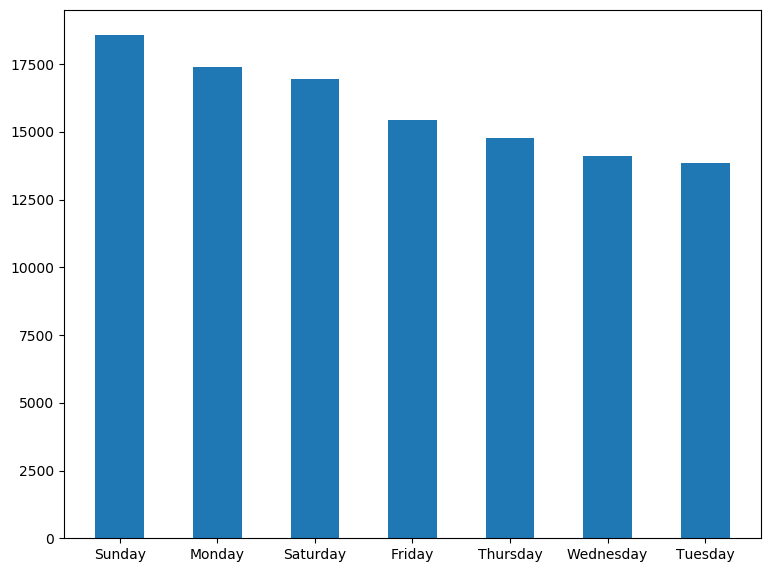

In [33]:
# INSERT YOUR CODE HERE
day_arr = []
for i in valid_DTS_list:
    day_arr.append(i.split()[0])

count_day = Counter(day_arr)
    
day_dict = {}
for i in set(day_arr):
    day_dict[i] = count_day[i]

print('The minimum value is', min(day_dict), 'which is', day_dict[min(day_dict)])
print('The maximum value is', max(day_dict), 'which is', day_dict[max(day_dict)])
print('The mean value is', len(valid_DTS_list)/7)
print('The median value is', day_arr[int(len(valid_DTS_list)/2)])
#Resize
plt.figure(figsize = (9,7), dpi=100)
desc_count_day = dict(sorted(count_day.items(),key=operator.itemgetter(1),reverse=True))
plt.bar(desc_count_day.keys(), desc_count_day.values(), 0.5)
plt.show()

<BarContainer object of 4 artists>

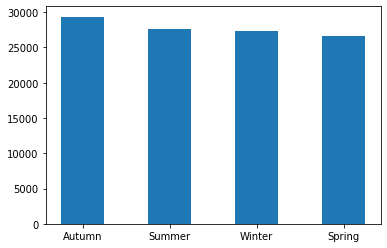

In [34]:
# INSERT YOUR CODE HERE
season_arr = []
for i in valid_DTS_list:
    season_arr.append(i.split()[3])

count_season = Counter(season_arr)
    
season_dict = {}
for i in set(season_arr):
    season_dict[i] = count_season[i]
    
desc_count_season = dict(sorted(count_season.items(),key=operator.itemgetter(1),reverse=True))
plt.bar(desc_count_season.keys(), desc_count_season.values(), 0.5)

There are 17774 crash data that are valid


<BarContainer object of 4 artists>

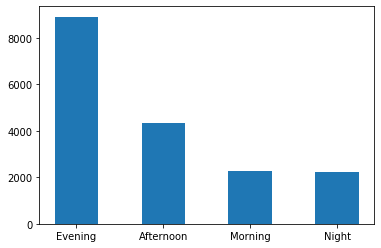

In [36]:
# INSERT YOUR CODE HERE

data_datetime_arr_new = []
for i in data_datetime_arr:
    if (data_dict['Injury_Severity'][data_datetime_arr.index(i)] == 1):
        data_datetime_arr_new.append(i)

valid_inj_DTS_list = []
for i in data_datetime_arr_new:
    if (i != 'INVALID'):
        valid_inj_DTS_list.append(i)
        
print('There are', len(valid_inj_DTS_list), 'crash data that are valid')

time_arr = []
for i in valid_inj_DTS_list:
    time_arr.append(i.split()[1])

count_time = Counter(time_arr)
    
time_dict = {}
for i in set(time_arr):
    time_dict[i] = count_time[i]
    
desc_count_time = dict(sorted(count_time.items(),key=operator.itemgetter(1),reverse=True))
plt.bar(desc_count_time.keys(), desc_count_time.values(), 0.5)

In [ ]:
#INSERT YOUR COMMENT HERE
# Extrime values won't effect on median, which it will on mean

---
## **Instruction 6**
Continue from the previous steps, **your tasks are:**

1. Write your code to find and print all the invalid entry indices. An entry is invalid if it has been marked as `INVALID` by **compute_time_day_year** function. Also print how many invalid entries are in the dataset. (**2 marks**)
2. Write your code to filter out all invalid entries and store your data into a new variable **data_dict_cleaned** and print out the number of data records after being cleaned. (**2 marks**)

3. Define a function, which takes a time string in form `%H:%M:%S` as an input and computes time in hours since 
midnight. Note that the time in hours does not have to be integer. (**3 marks**)

4.  Write your code to produce a scatter plot of age of a person involved in a car accident vs time since midnight for that accident. Use the data for year 2005 only. (**3 marks**)

[**Total mark: 10**]

In [ ]:
# INSERT YOUR CODE HERE
data_datetime_arr = []
for i in range(0, data_dict['Index'][-1]-2):
    data_datetime_arr.append(compute_time_day_year(data_dict['Year'][i], data_dict['Crash_Month'][i], data_dict['Crash_Day'][i], data_dict['Crash_Time'][i]))

count_invalid = 0
for i in data_datetime_arr:
    if (i == "INVALID"):
        print(i)
        count_invalid += 1
        
print("There are", count_invalid, "invalid data")

In [ ]:
# INSERT YOUR CODE HERE


In [ ]:
# INSERT YOUR CODE HERE

In [ ]:
# INSERT YOUR CODE HERE

## **Instruction 7**
Think about the results above. Can you tell which fields in the dataset have been tampered with? Why do you think so? (**5 marks**)

[**Total mark: 5**]

In [ ]:
# INSERT YOUR COMMENT HERE
# 
# The "Crash_time" and "Gender" field are the fields that has been tanpered with since there are a lot of "UNKNOWN" values inside of those field